**Here I will examine how several spatial and temporal variables relate to certain types of crimes in an effort to figure out what variables would be useful to predict the type of crime.  **

In [11]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
pd.options.display.max_columns = 1000

In [12]:
# Reading in the crime data csv file and converting to a dataframe.   
crime_df = pd.read_csv('Crimes_2001_into_2018_Cleaned3.csv', parse_dates = ['Date'])

In [13]:
crime_df.head()

ID                Date                   Block   Primary Type  \
0  10000092 2015-03-18 19:44:00         047XX W OHIO ST        BATTERY   
1  10000094 2015-03-18 23:00:00  066XX S MARSHFIELD AVE  OTHER OFFENSE   
2  10000095 2015-03-18 22:45:00   044XX S LAKE PARK AVE        BATTERY   
3  10000096 2015-03-18 22:30:00    051XX S MICHIGAN AVE        BATTERY   
4  10000097 2015-03-18 21:00:00        047XX W ADAMS ST        ROBBERY   

  Location Description  Domestic  Beat  District  Ward  Community Area  \
0               STREET     False  1111      11.0  28.0            25.0   
1               STREET     False   725       7.0  15.0            67.0   
2            APARTMENT      True   222       2.0   4.0            39.0   
3            APARTMENT     False   225       2.0   3.0            40.0   
4             SIDEWALK     False  1113      11.0  28.0            25.0   

    Latitude  Longitude  Month  Season Quarter Day of the Week Day Type  \
0  41.891399 -87.744385      3  SPRING      Q1       WEDNESDAY  WEEKDAY   
1  41.773372 -87.665319      3  SPRING      Q1       WEDNESDAY  WEEKDAY   
2  41.813861 -87.596643      3  SPRING      Q1       WEDNESDAY  WEEKDAY   
3  41.800802 -87.622619      3  SPRING      Q1       WEDNESDAY  WEEKDAY   
4  41.878065 -87.743354      3  SPRING      Q1       WEDNESDAY  WEEKDAY   

  Part of Day            Street    Street Short  Distance from Chicago (km)  \
0     EVENING         W OHIO ST         OHIO ST                       10.09   
1     EVENING  S MARSHFIELD AVE  MARSHFIELD AVE                       12.56   
2     EVENING   S LAKE PARK AVE   LAKE PARK AVE                        7.87   
3     EVENING    S MICHIGAN AVE    MICHIGAN AVE                        9.01   
4     EVENING        W ADAMS ST        ADAMS ST                        9.96   

   Closest Police Station (District)  Distance to Closest Police Station (km)  \
0                               15.0                                     2.34   
1                                7.0                                     0.79   
2                                2.0                                     3.11   
3                                2.0                                     0.67   
4                               15.0                                     2.07   

      Holiday Closest Train Stop Closest Train Line  \
0  No Holiday             Cicero         Green Line   
1  No Holiday       Ashland/63rd         Green Line   
2  No Holiday               43rd         Green Line   
3  No Holiday               51st         Green Line   
4  No Holiday             Cicero          Blue Line   

   Distance to Closest Train Stop (km)         Closest Bus Stop  \
0                                 0.54            Cicero & Ohio   
1                                 0.62    Ashland & 66th Street   
2                                 1.88  Oakenwald & 43rd Street   
3                                 0.37   51st Street & Michigan   
4                                 0.74     Jackson & Kilpatrick   

   Distance to Closest Bus Stop (km)                Closest Liquor Store  \
0                               0.10              MAZE FOOD & LIQUOR INC   
1                               0.12       BIG SAM'S FOOD & LIQUOR, INC.   
2                               0.35  ONE STOP FOOD & LIQUOR STORE, INC.   
3                               0.13      51ST EXPRESS FOOD & LIQUOR INC   
4                               0.13           NIJAR FOOD & LIQUOR, INC.   

   Distance to Closest Liquor Store (km)  
0                                   0.10  
1                                   0.53  
2                                   0.37  
3                                   0.15  
4                                   0.70

In [14]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6726510 entries, 0 to 6726509
Data columns (total 31 columns):
ID                                         int64
Date                                       datetime64[ns]
Block                                      object
Primary Type                               object
Location Description                       object
Domestic                                   bool
Beat                                       int64
District                                   float64
Ward                                       float64
Community Area                             float64
Latitude                                   float64
Longitude                                  float64
Month                                      int64
Season                                     object
Quarter                                    object
Day of the Week                            object
Day Type                                   object
Part of Day                  

## Primary Type of Crime 

With over 1.2 million crimes, theft and battery are the most frequent crimes.  Looking at Figure 1, it would make sense to focus my study on primary types of crime ranging from theft to criminal trespassing as there are many samples for them. 

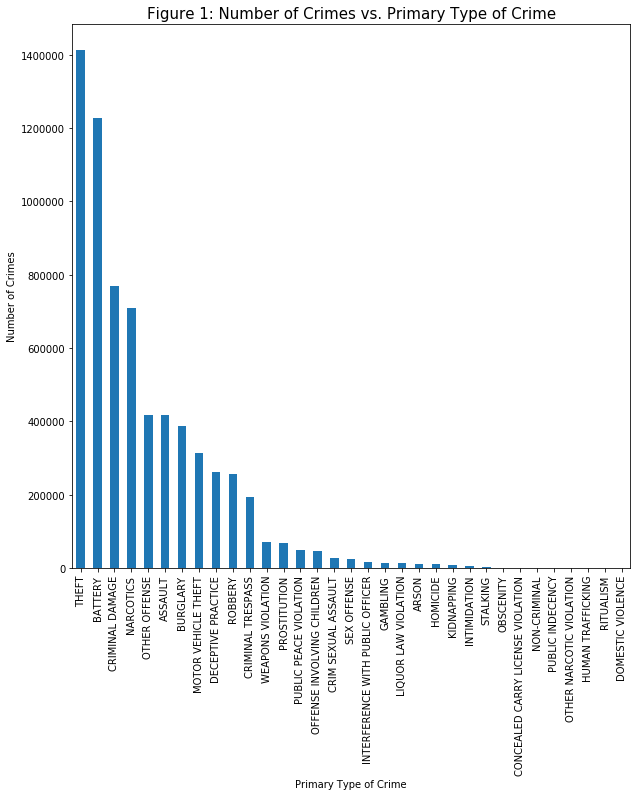

In [15]:
# Getting counts of each primary type of crime
counts = crime_df['Primary Type'].value_counts()

# Creating a dataframe of counts 
df_type = counts.rename_axis('Primary Type').reset_index(name='counts')

# Plotting the number of crimes by primary type
_ = df_type.plot.bar(x = 'Primary Type', legend = None, figsize = (10,10))
_ = plt.xlabel('Primary Type of Crime')
_ = plt.ylabel('Number of Crimes')
_ = plt.title('Figure 1: Number of Crimes vs. Primary Type of Crime', size=15)

In [16]:
# Getting data for the top 11 primary types of crimes
crime_df = crime_df[[each in ['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'OTHER OFFENSE', 'ASSAULT', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'DECEPTIVE PRACTICE', 'ROBBERY', 'CRIMINAL TRESPASS'] for each in crime_df['Primary Type']]]
crime_df = crime_df.reset_index(drop = True)  # Resetting the index for crime_df_top11 before moving on

## Ward

Per Figure 2, not all of the primary crime types have the same distribution of number of crimes across the wards.  For crimes involving narcotics, wards 24 and 28 have the highest numbers.  For crimes involving deceptive practice and theft, ward 42 has by far the highest number of crimes.  There may be a slight relationship between the ward and primary type of crime.  So ward, along with other variables, may be useful in predicting the type of crime.  

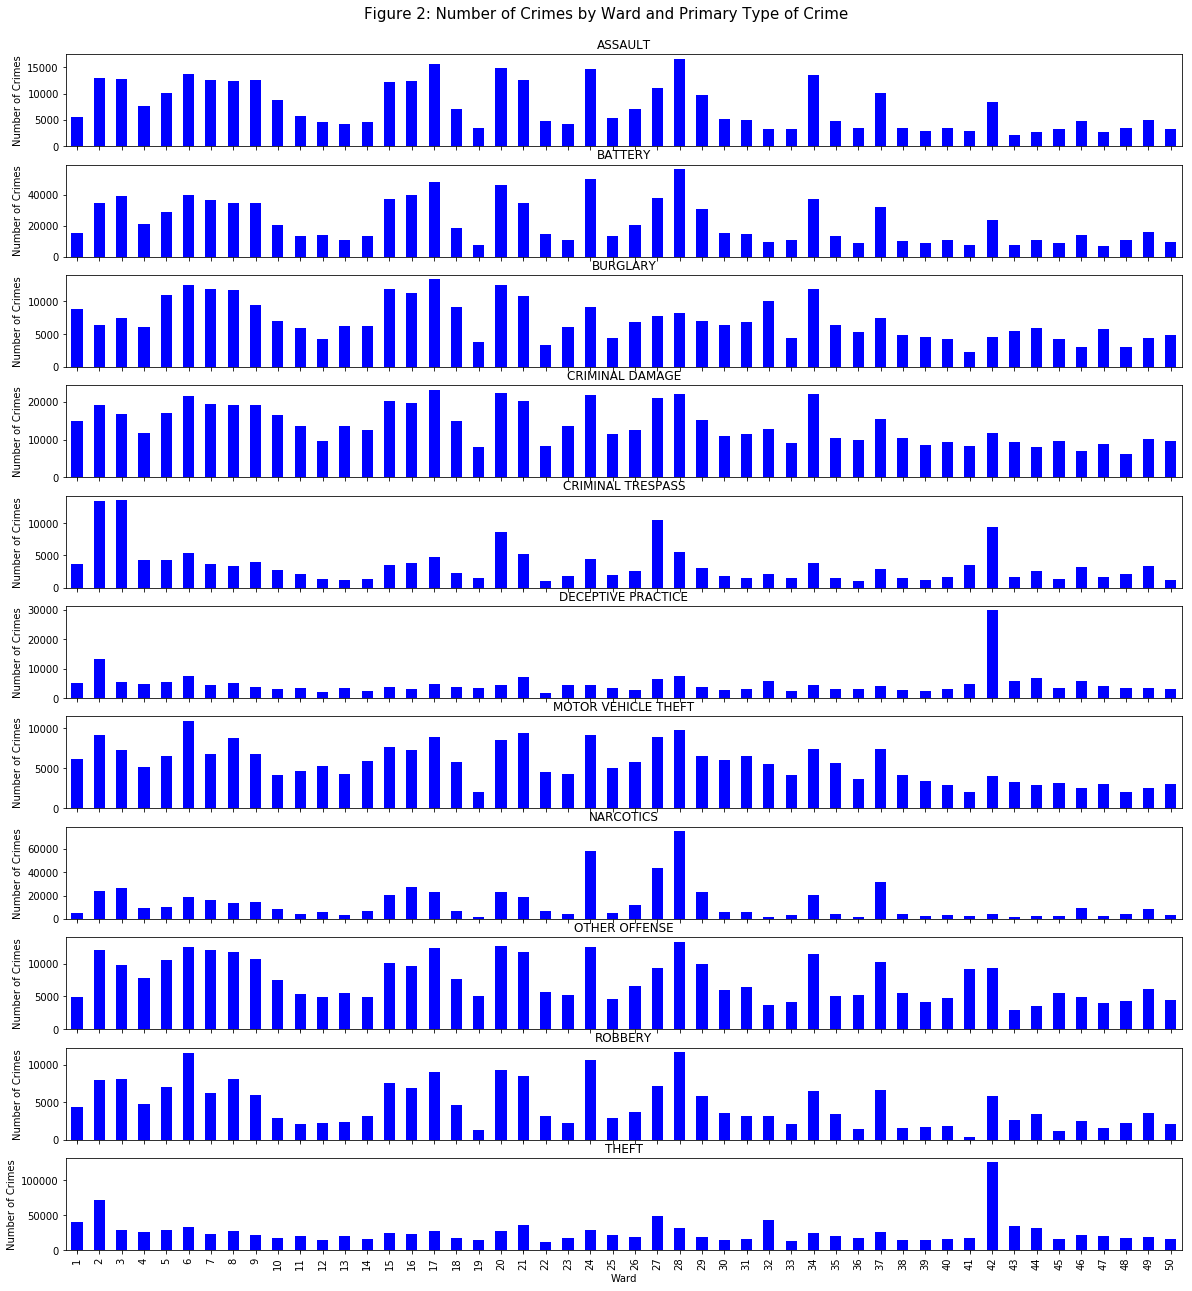

In [7]:
# Getting number of crimes per ward and converting to a dataframe
crime_df_ward = crime_df.pivot_table(index = 'Ward', columns = 'Primary Type', values = 'Date', aggfunc = len)
crime_df_ward.index = crime_df_ward.index.astype('int')

# Making a bar plot of the number of crimes per ward.  
ax = crime_df_ward.plot.bar(figsize = (20,22), subplots = True, legend = False, color = 'blue')
plt.suptitle('Figure 2: Number of Crimes by Ward and Primary Type of Crime', y = 0.91, size = 15)
for x in range(11):
    ax[x].set_ylabel('Number of Crimes')

## Police District

In Figure 3a, the most prevalent crime type for most districts are theft and battery. This makes sense as they are the two most frequently occuring crimes (as seen in Figure 1). Districts 1 and 18 have the highest counts of crimes related to theft while district 20 has the lowest counts. It is interesting that crimes related to narcotics is actually most prevalanet for districts 11 and 15.

Figure 3b shows that districts 1 and 18 have the highest proportions of crimes involving theft while districts 11 and 15 have the highest proportions of crimes involving narcotics. There does seem to be some relationship between the police district and primary type of crime. So police district, along with other variables, may be useful in predicting the type of crime.

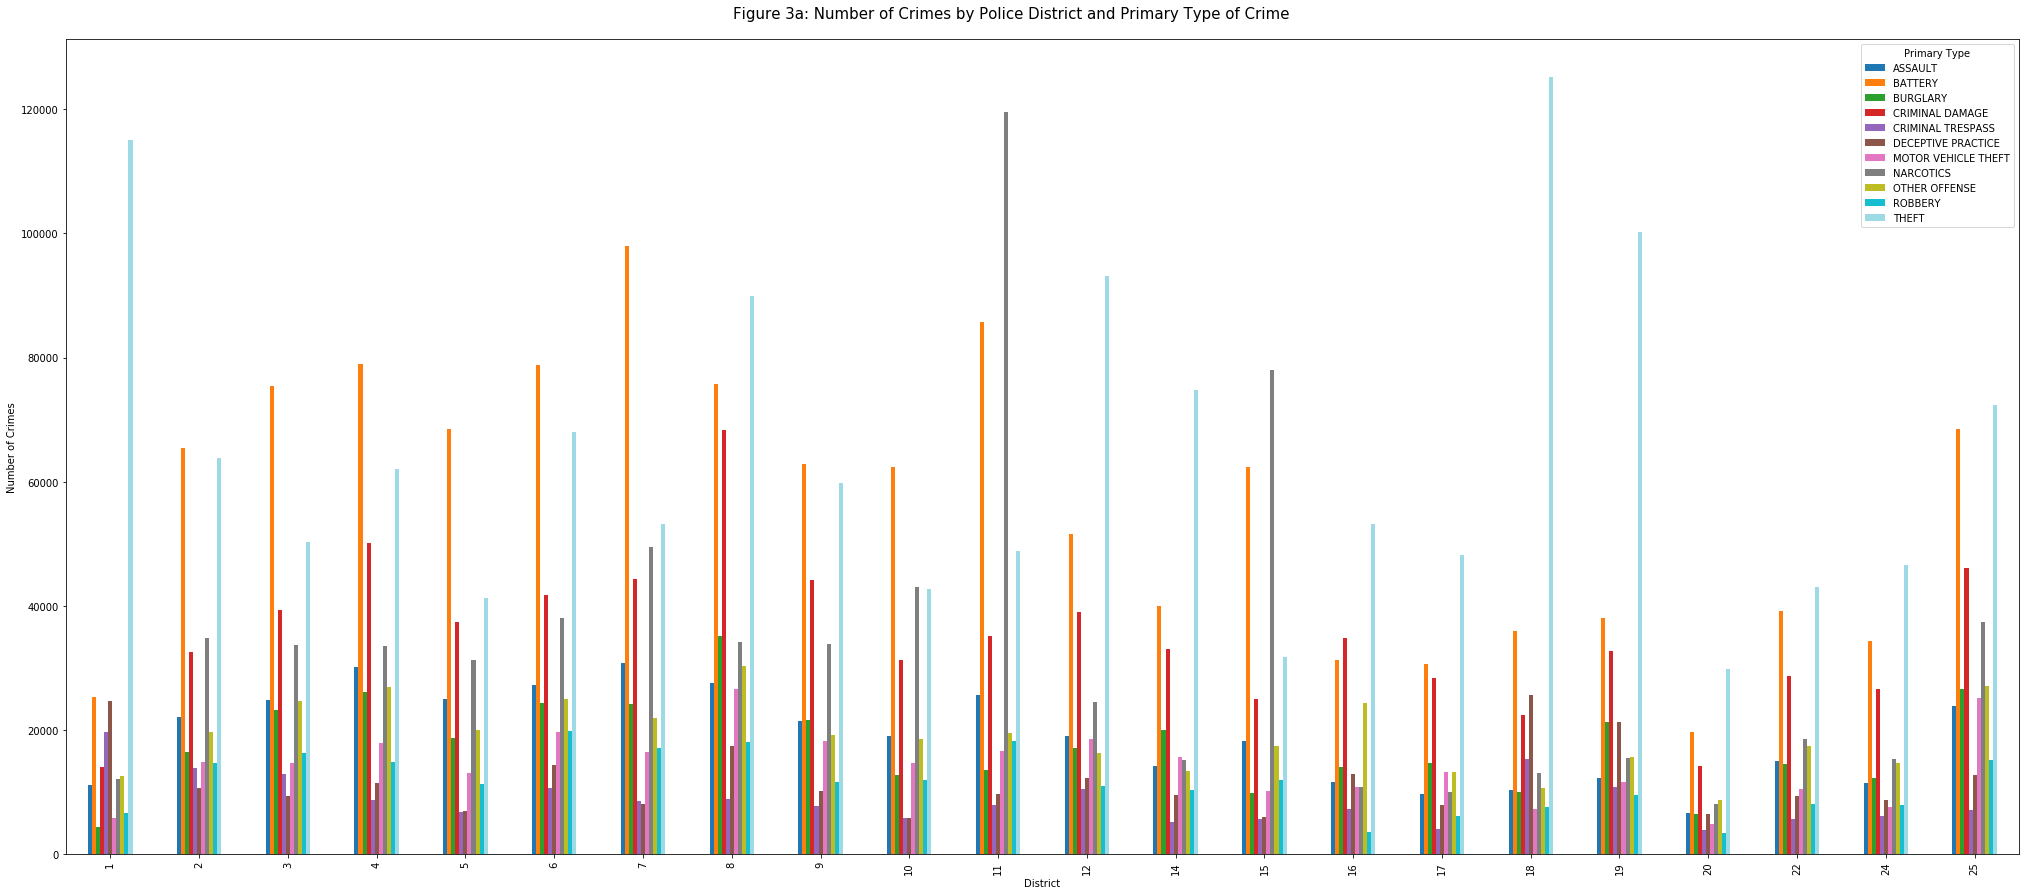

In [46]:
# Getting number of crimes per police beat and converting to a dataframe
crime_df_district = crime_df.pivot_table(index = 'District', columns = 'Primary Type', values = 'Date', aggfunc = len)
crime_df_district.index = crime_df_district.index.astype('int')

# Making a bar plot of the number of crimes per police district
ax1 = crime_df_district[(crime_df_district.index != 21) & (crime_df_district.index != 31)].plot.bar(figsize = (35,15), subplots = False, legend = True, colormap = 'tab20', stacked=False)
_ = plt.suptitle('Figure 3a: Number of Crimes by Police District and Primary Type of Crime', y = 0.91, size = 15)
_ = plt.ylabel('Number of Crimes')

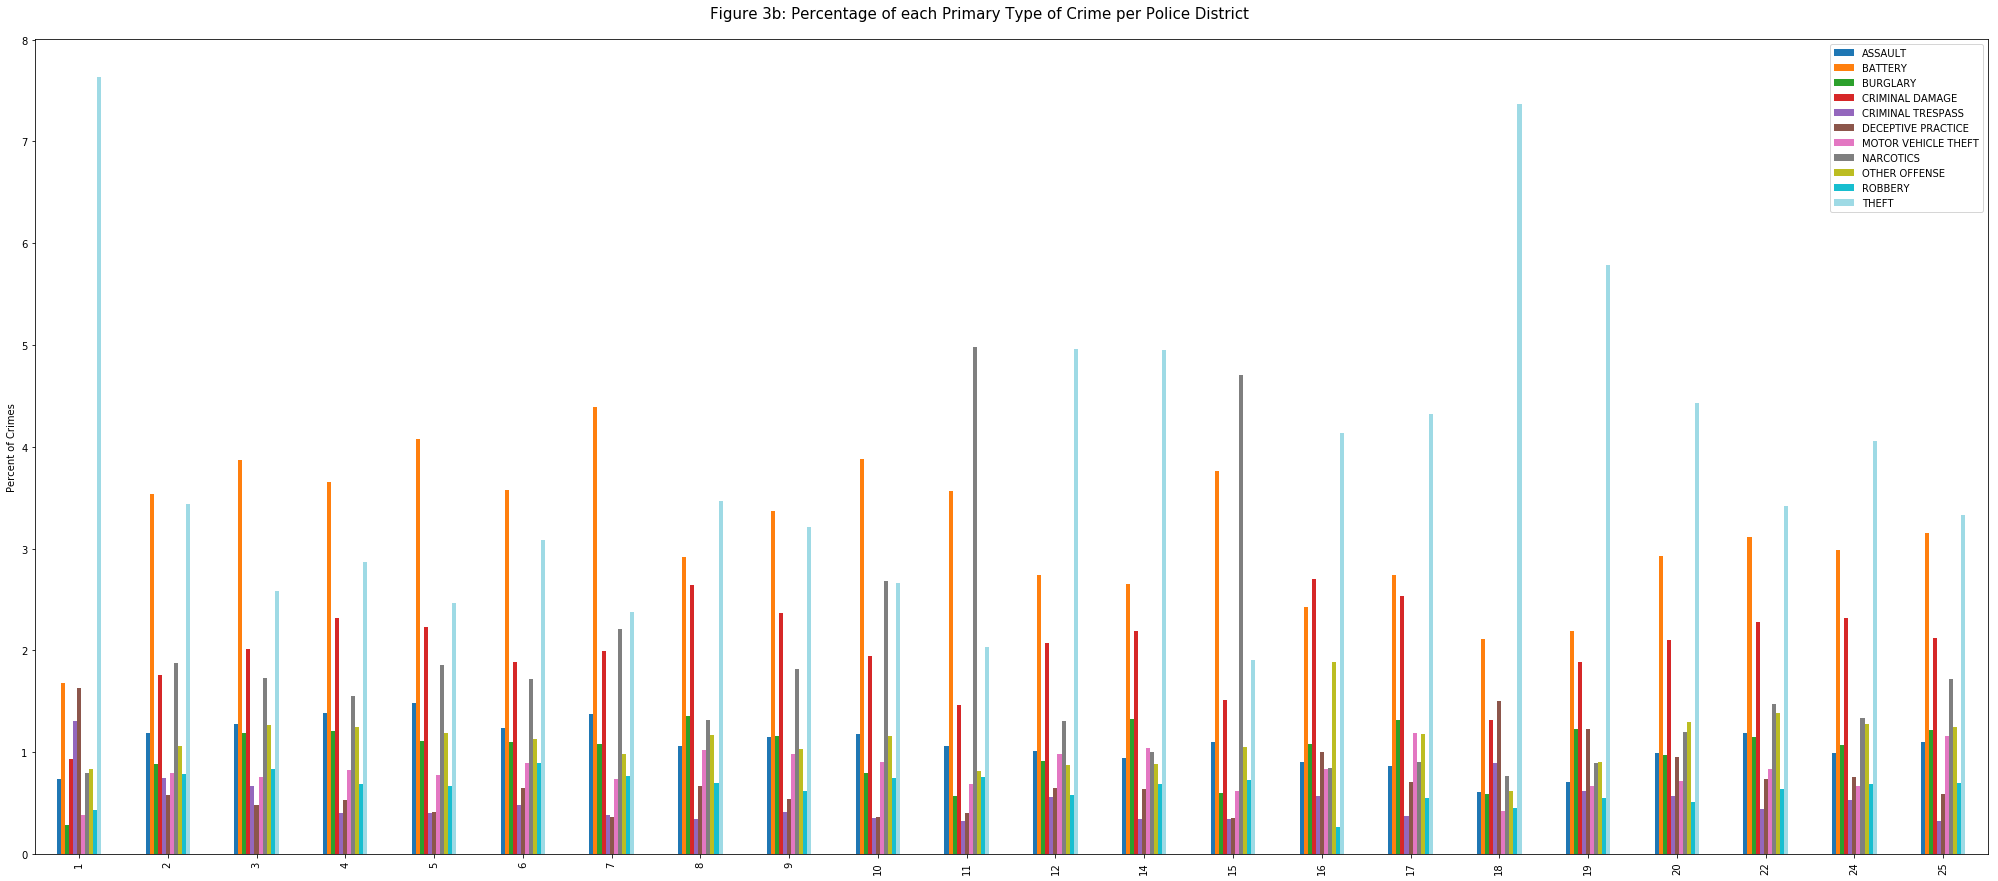

In [71]:
# Calculating the percentage of crimes within each district
crime_df_district['Totals'] = crime_df_district.sum(axis=1)
crime_df_district_prop = pd.DataFrame()
for r in crime_df_district.index: 
    for c in crime_df_district.columns:
        if c != 'Totals':
            crime_df_district_prop.loc[r, c] = crime_df_district.loc[r, c] * 100 / crime_df_district.loc[r, 'Totals']

# Making a bar plot of the number of crimes per police district
ax1 = crime_df_district_prop[(crime_df_district_prop.index != 21) & (crime_df_district_prop.index != 31)].plot.bar(figsize = (35,15), subplots = False, legend = True, colormap = 'tab20', stacked=False)
_ = plt.suptitle('Figure 3b: Percentage of each Primary Type of Crime per Police District', y = 0.91, size = 15)
_ = plt.ylabel('Percent of Crimes')

## Beat

Looking at a sample of the police beats in Figure 4, criminal trespassing, deceptive practice and theft have different crime distributions across the beats compared to the other crime types.  It is therefore possible that the police beat may be useful in predicting the type of crime but I will need other variables as well.  

Number of Police Beats:  304


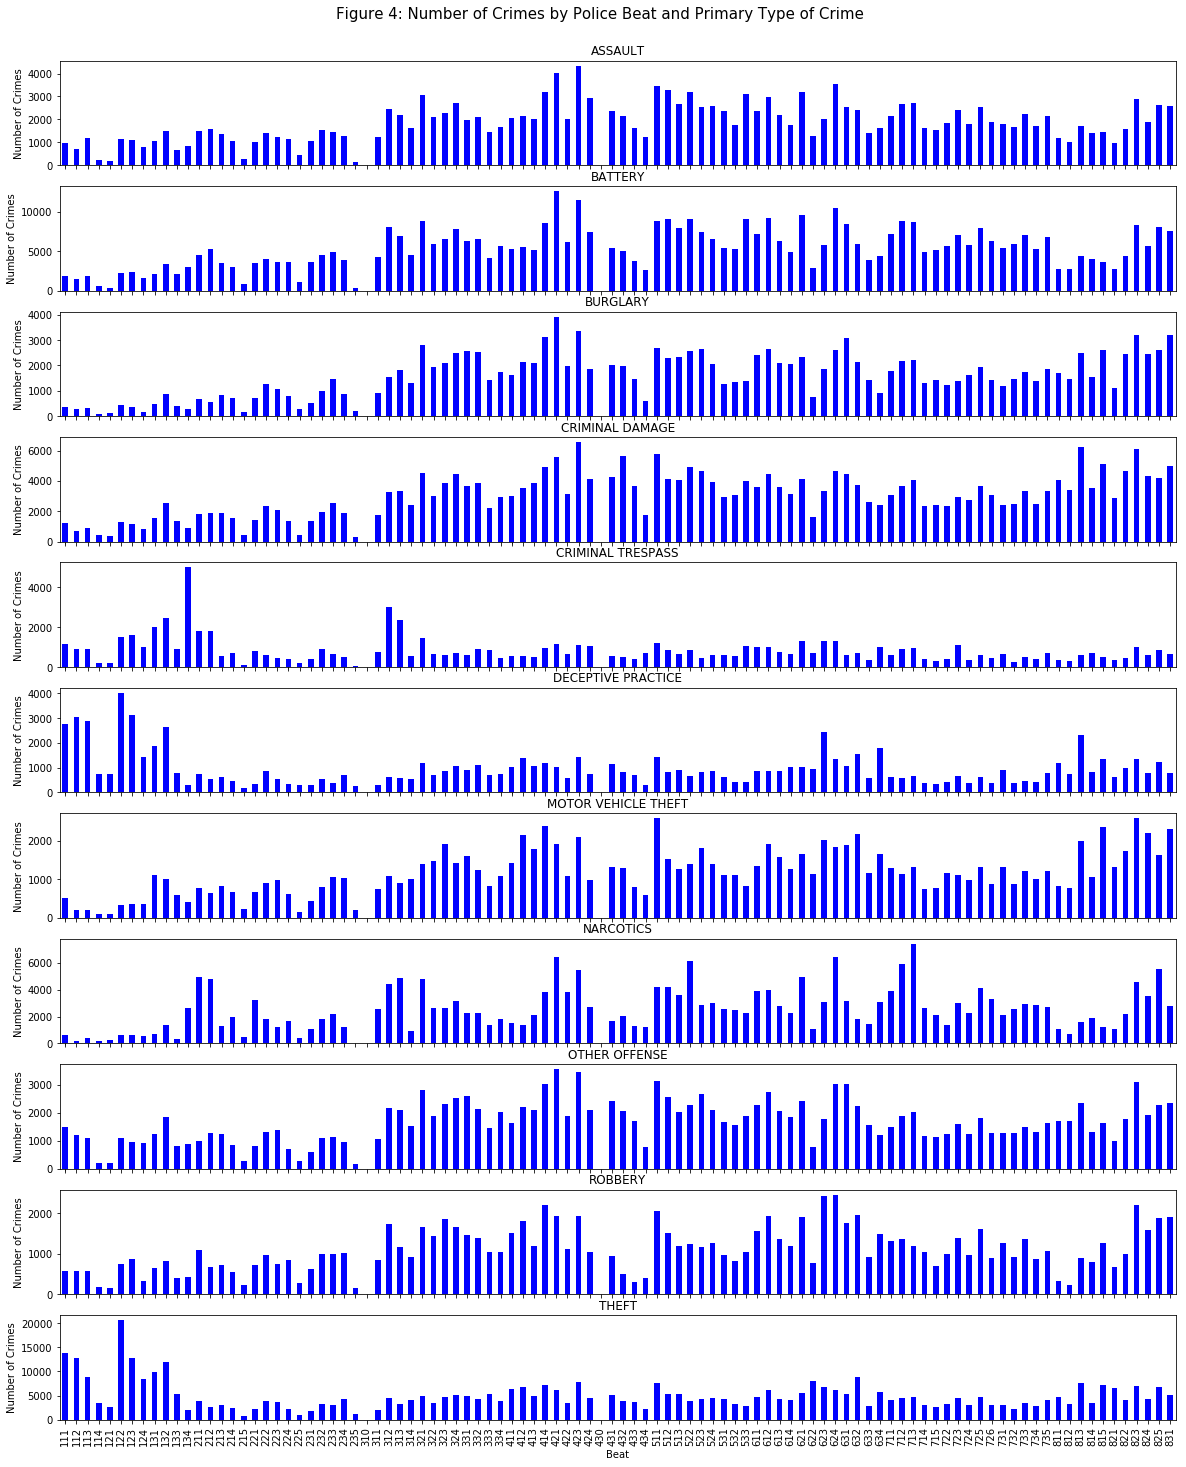

In [10]:
# Getting number of crimes per police beat and converting to a dataframe
crime_df_beat = crime_df.pivot_table(index = 'Beat', columns = 'Primary Type', values = 'Date', aggfunc = len)

num_beats = len(set(crime_df['Beat']))
print('Number of Police Beats: ', num_beats)

# Making a bar plot of the number of crimes per police beat.  Only plotting the first 100 beats. 
ax = crime_df_beat[:100].plot.bar(figsize = (20,25), subplots = True, legend = False, color = 'blue')
plt.suptitle('Figure 4: Number of Crimes by Police Beat and Primary Type of Crime', y = 0.91, size = 15)
for x in range(11):
    ax[x].set_ylabel('Number of Crimes')

## Community

Figure 5 shows that the distribution of the occurence of crimes across each community is not the same for each primary type of crime.  It is shown that some communities have relatively high levels of several types of crimes (e.g. communities 8 and 25).  It is also shown that many communities have relatively low levels of several types of crimes.  This tells me that community would be somewhat helpful in predicting the primary type of crime, but additional variables would be needed in order to make an accurate prediction. 

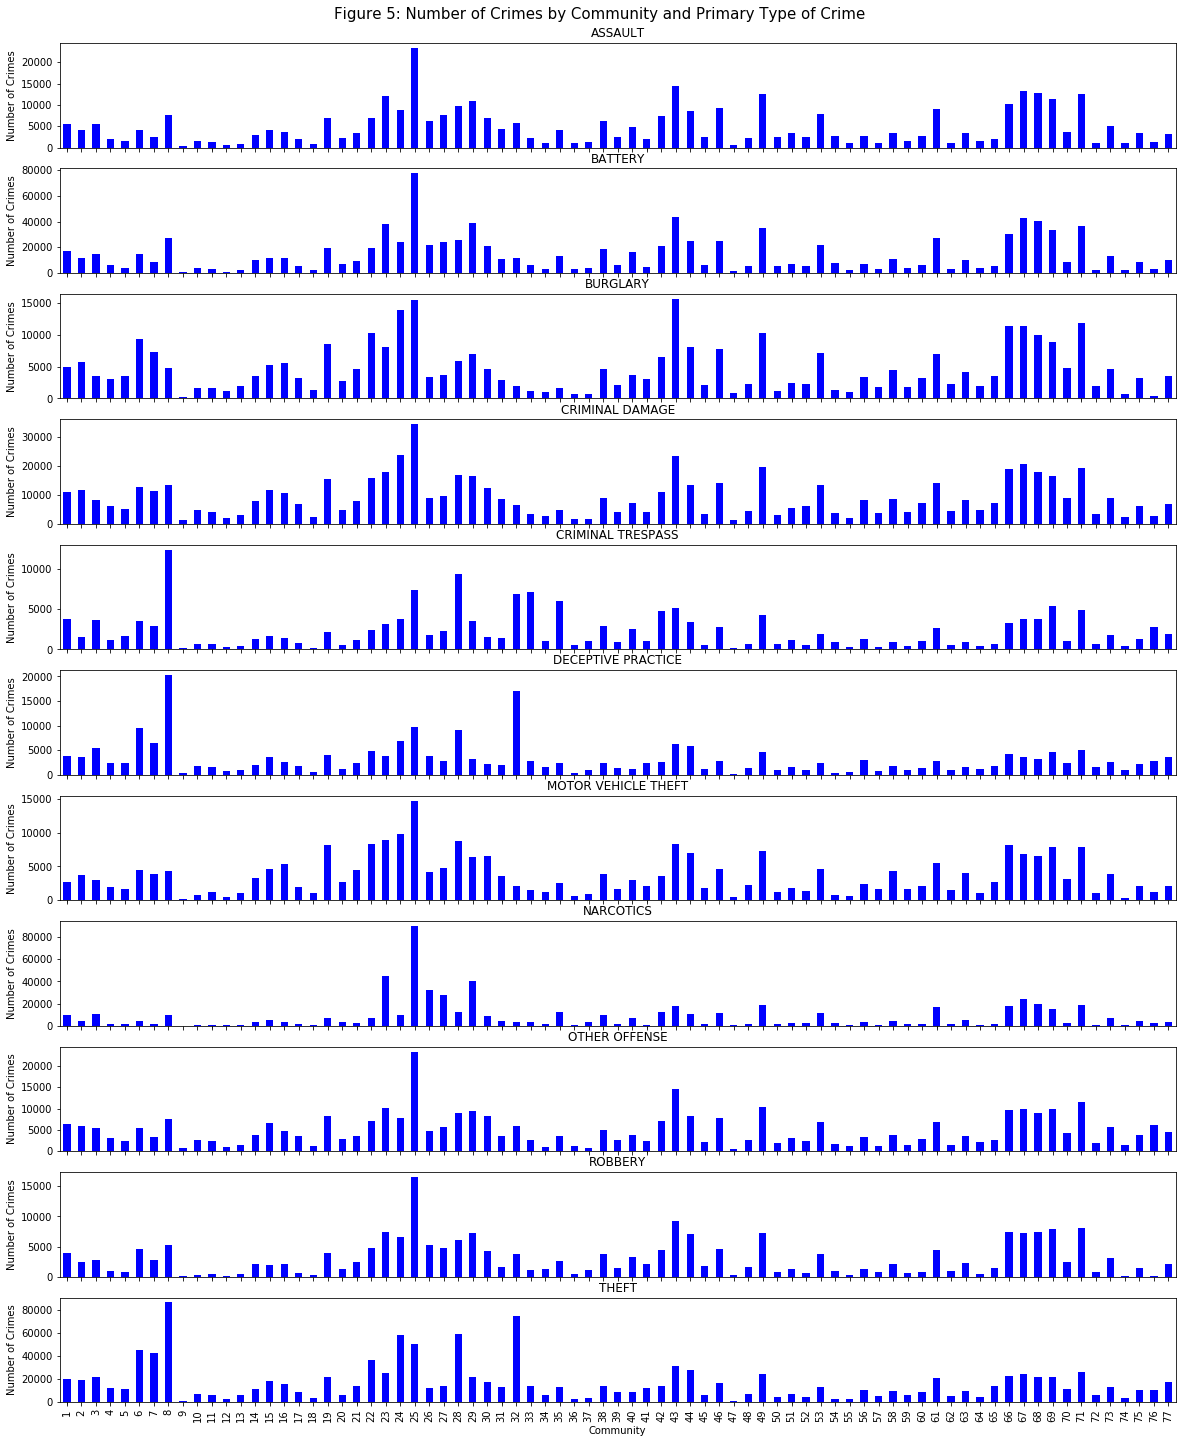

In [11]:
# Getting the number of each type of crime per community
crime_df_community = crime_df.pivot_table(index = 'Community Area', columns = 'Primary Type', values = 'Date', aggfunc = len)

# Community area 0 looks to be an error.  I will get rid of it for now. 
crime_df_community = crime_df_community[crime_df_community.index != 0]

# Plotting crimes by community and primary type 
axes = crime_df_community.plot.bar(by = 'Primary Type', figsize = (20,25), subplots = True, legend = False, color = 'blue')
plt.suptitle('Figure 5: Number of Crimes by Community and Primary Type of Crime', y = 0.9, size = 15)
plt.xticks(np.arange(0,77), crime_df_community.index.astype('int'))
plt.xlabel('Community')
for each in axes:
    each.set_ylabel('Number of Crimes')

## Location Description

According to Figure 6, the 4 locations with the most crime are street, residence, apartment, and sidewalk.  These locations are seen to be more prominent in Figure 7.  In general, there is a different distribution in the occurence of crimes across the location descriptions for each primary type of crime.  This would make location description a helpful variable in predicting the primary type of crime.  For example, crimes involving theft more often occur on the street.  However, the street also has relatively high levels of crimes involving assault, battery, criminal damage, motor vehicle theft, narcotics, and robbery.  As each location does not have a strong relationship with a single primary type of crime, additional variables would be needed. 

Number of Unique Location Descriptions:  109


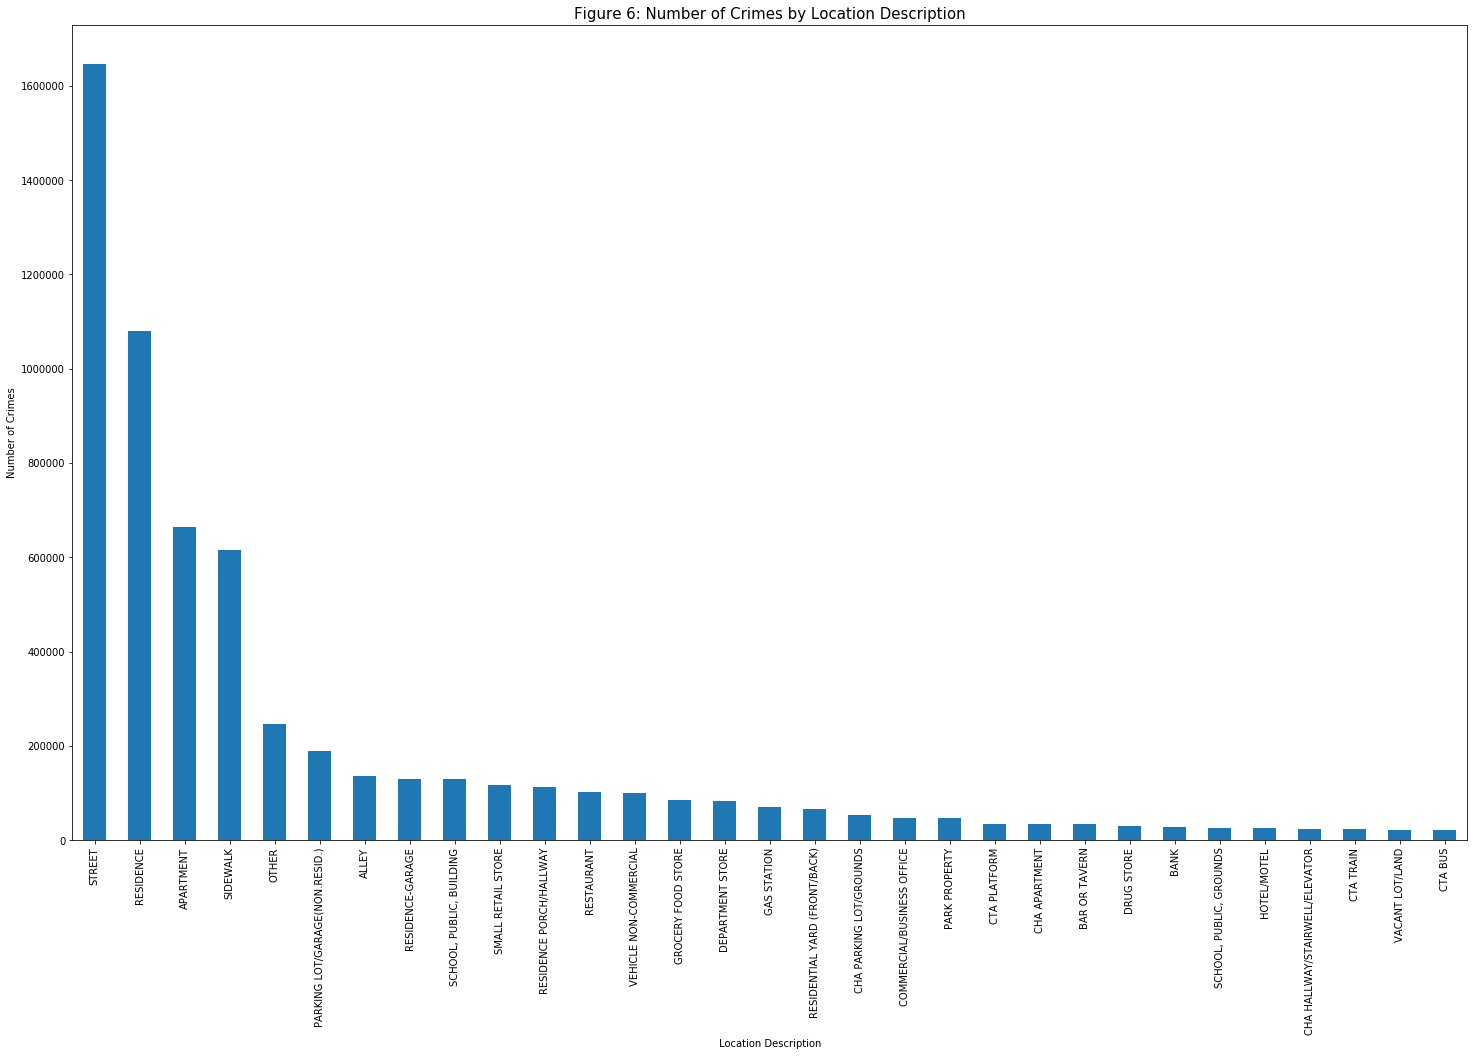

In [12]:
# getting number of crimes per location and converting to a dataframe
counts = crime_df['Location Description'].value_counts()  
df_location = counts.rename_axis('Location Description').reset_index(name = 'counts') 

num_locations = len(set(crime_df['Location Description']))
print('Number of Unique Location Descriptions: ', num_locations)

# Making a bar plot of number of crimes per location.  Since there are a lot of locations, I am excluding locations that have counts less than 20000. 
_ = df_location[df_location['counts'] > 20000].plot.bar(x = 'Location Description', legend = None, figsize = (25,15))
_ = plt.xlabel('Location Description')
_ = plt.ylabel('Number of Crimes')
_ = plt.title('Figure 6: Number of Crimes by Location Description', size=15)

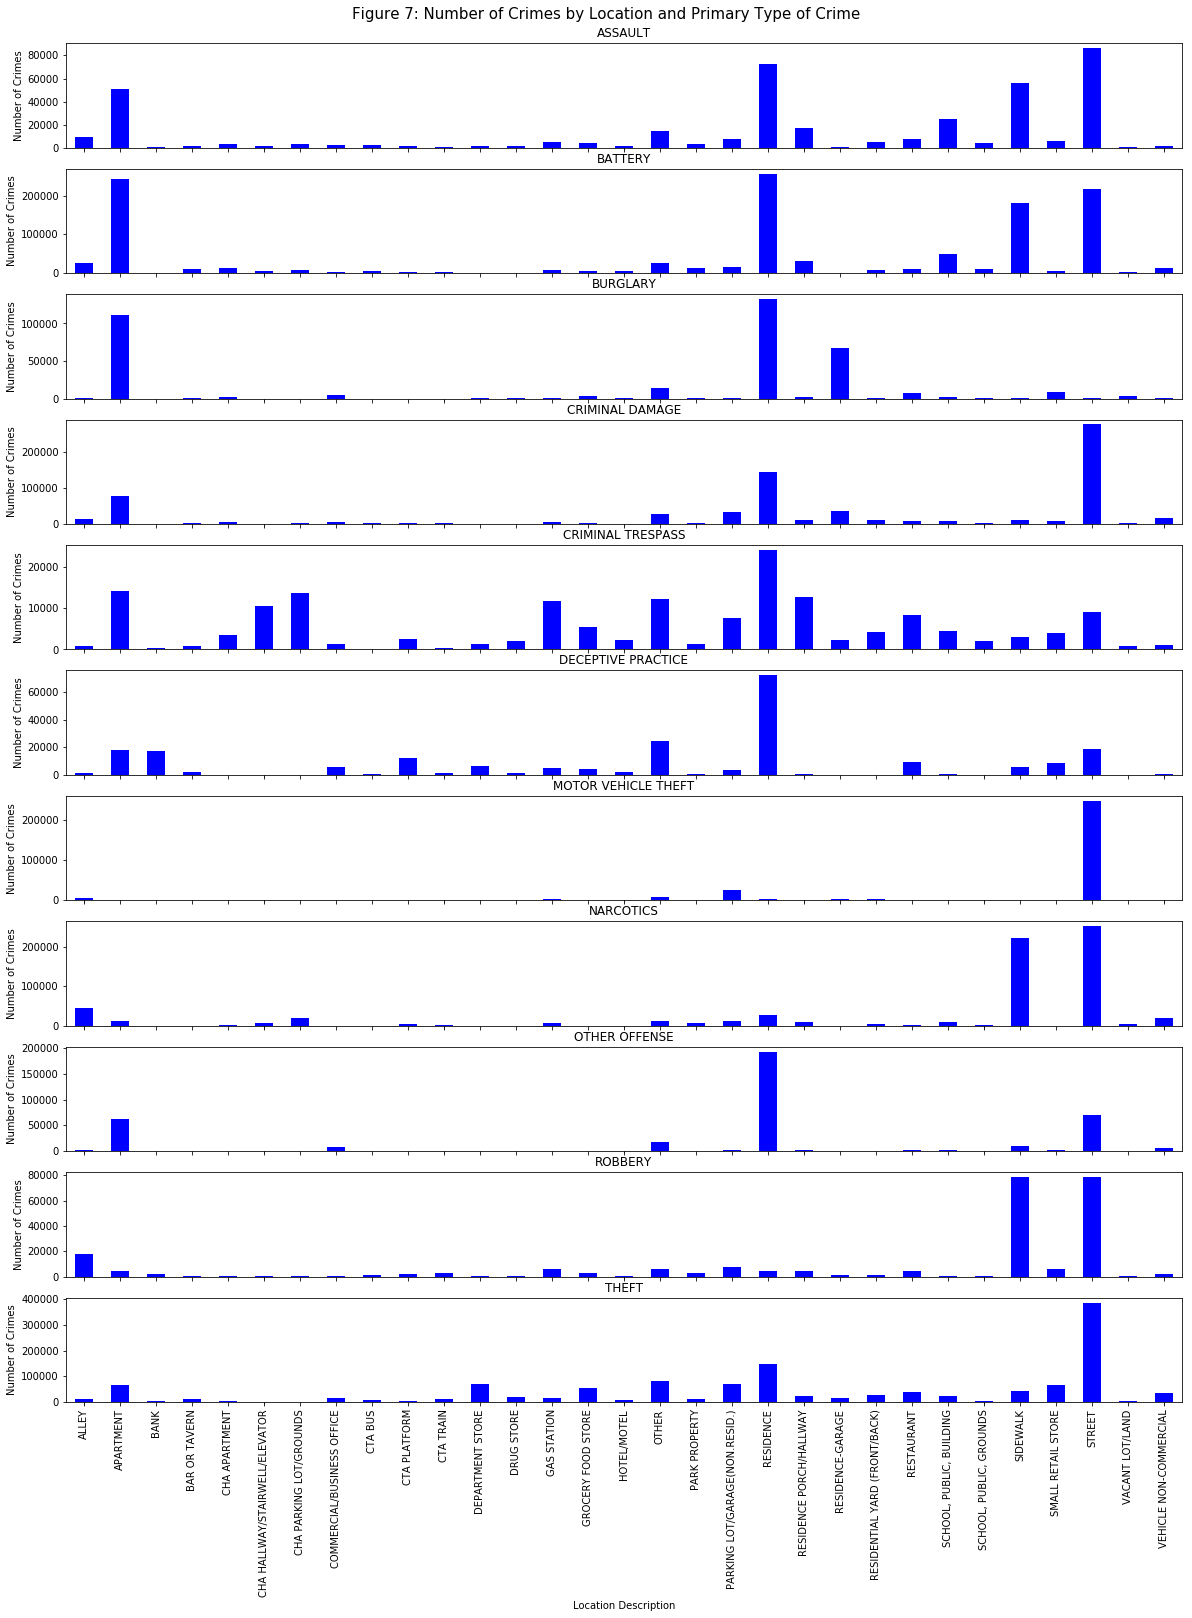

In [13]:
# Getting the number of each type of crime per location
crime_df_location = crime_df.pivot_table(index = 'Location Description', columns = 'Primary Type', values = 'Date', aggfunc = len)

# Making a bar plot of number of crimes per location.  Since there are a lot of locations, I am excluding locations that have counts less than 20000. 
ax = crime_df_location[crime_df_location.sum(axis = 1) >= 20000].plot.bar(figsize = (20,25), subplots = True, legend = False, color = 'blue')
plt.suptitle('Figure 7: Number of Crimes by Location and Primary Type of Crime', y = 0.9, size = 15)
for x in range(11):
    ax[x].set_ylabel('Number of Crimes')

## Street

One street that stands out in Figure 8 is State Street because it has relatively high counts of crime for all primary types of crime except for burglary.  It is possible that the street could have a slight relationship with the type of crime.  However, it may not be feasible to use the street as a predictor as there are 3059 unique streets.  

Number of Unique Streets:  3059


Text(0.5,0,'Street')

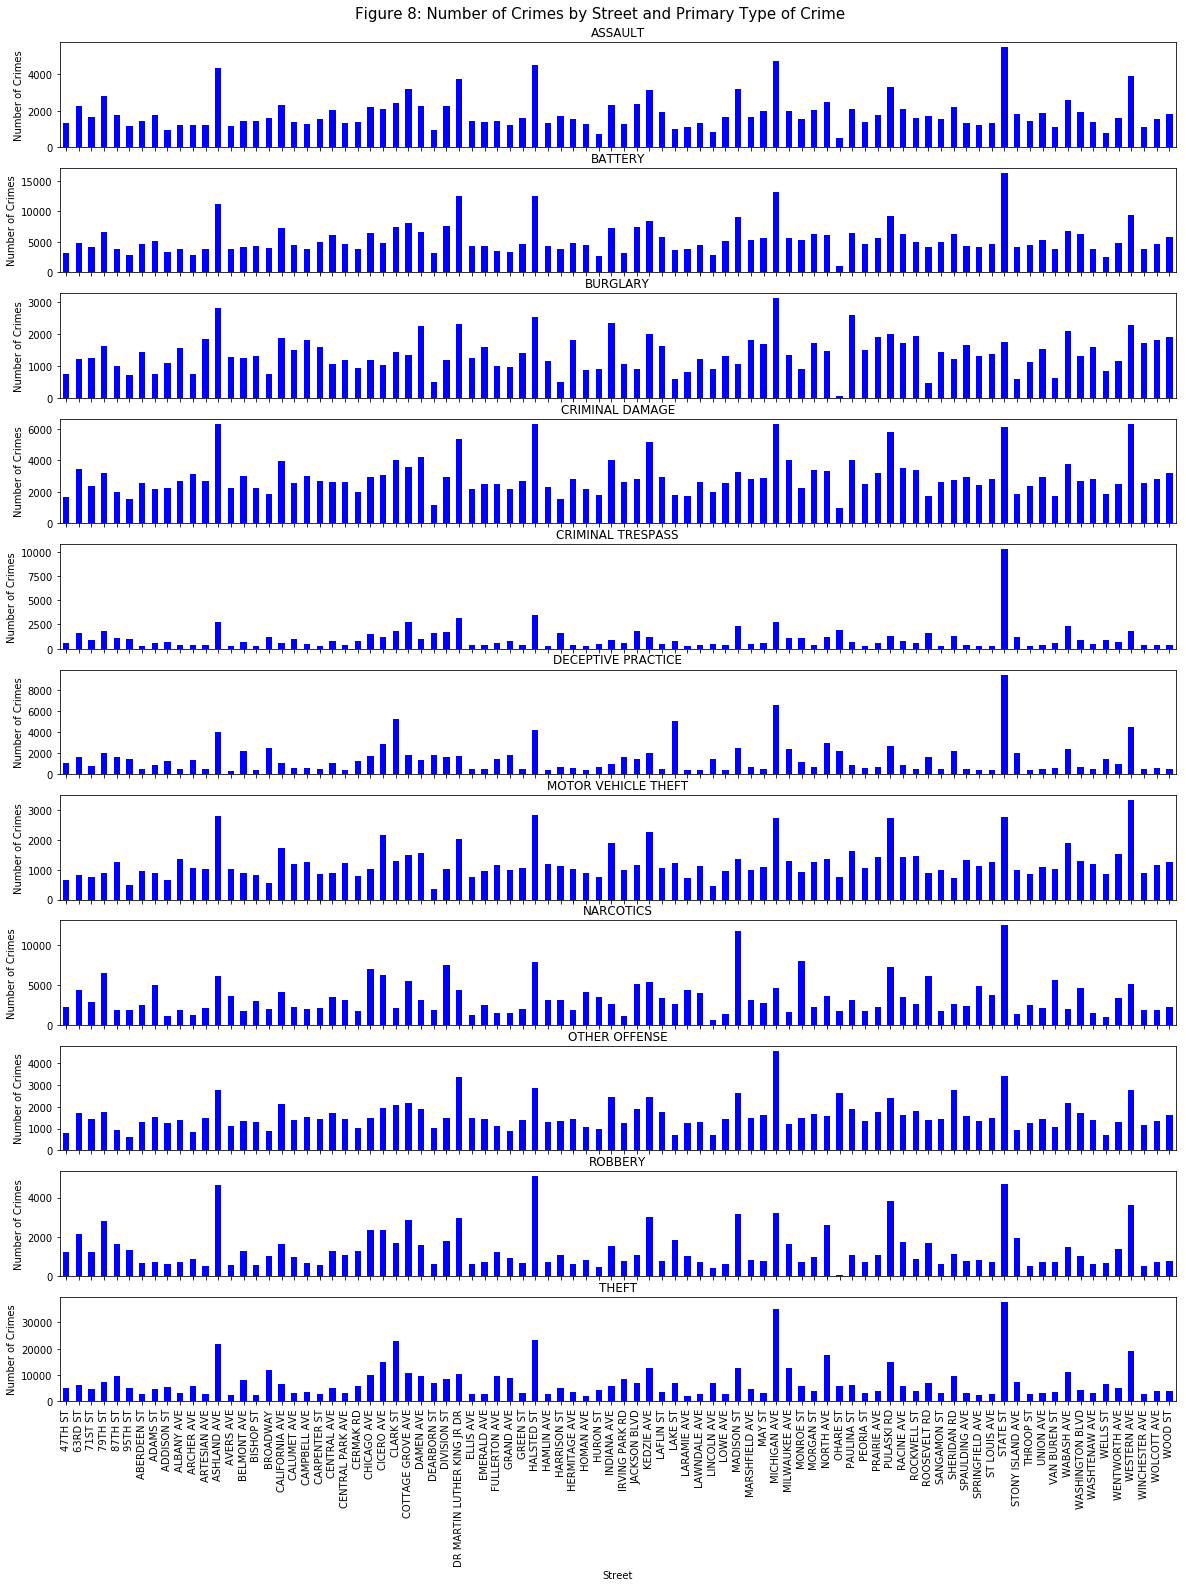

In [14]:
# Getting number of crimes per street and converting to a dataframe
crime_df_street = crime_df.pivot_table(index = 'Street Short', columns = 'Primary Type', values = 'Date', aggfunc = len)

num_streets = len(set(crime_df['Street Short']))
print('Number of Unique Streets: ', num_streets)

#Plotting a sample of streets where the count is at least 2500
ax = crime_df_street[crime_df_street.sum(axis = 1) >= 17000].plot.bar(figsize = (20,25), subplots = True, legend = False, color = 'blue')
plt.suptitle('Figure 8: Number of Crimes by Street and Primary Type of Crime', y = 0.9, size = 15)
for x in range(11):
    ax[x].set_ylabel('Number of Crimes')
plt.xlabel('Street')


## Block

In Figure 9, the distribution of crimes across the blocks per primary type of crime varies.  The block could therefore have  some relationship with the type of crime. However, it would not be feasible to use the block as a predictor as there are 57,757 unique blocks. 

Number of Unique Blocks:  57757


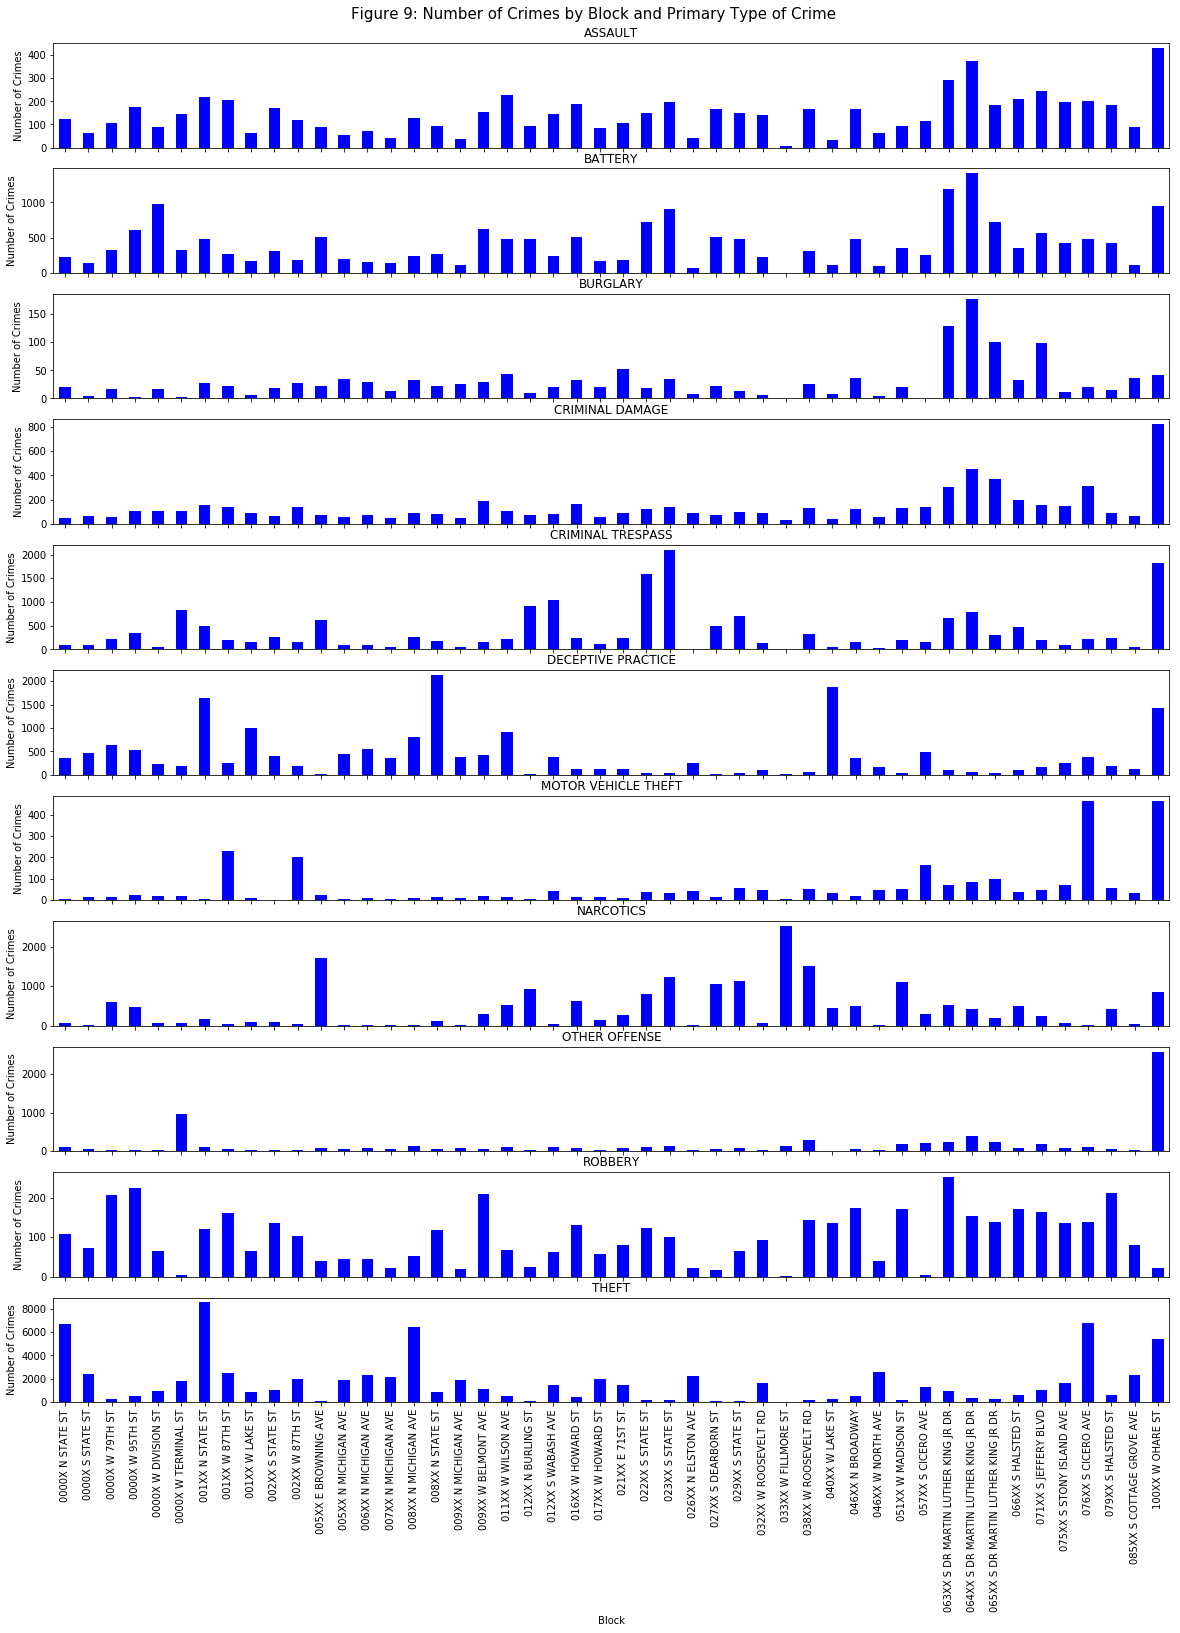

In [15]:
# Getting number of crimes per block and converting to a dataframe
crime_df_block = crime_df.pivot_table(index = 'Block', columns = 'Primary Type', values = 'Date', aggfunc = len)

num_blocks = len(set(crime_df['Block']))
print('Number of Unique Blocks: ', num_blocks)

#Plotting a sample of blocks where the count is at least 2500
ax = crime_df_block[crime_df_block.sum(axis = 1) >= 2500].plot.bar(figsize = (20,25), subplots = True, legend = False, color = 'blue')
plt.suptitle('Figure 9: Number of Crimes by Block and Primary Type of Crime', y = 0.9, size = 15)
for x in range(11):
    ax[x].set_ylabel('Number of Crimes')

## Latitude/Longitude

Figure 10a shows that crimes involving narcotics, theft, deceptive practice, and criminal trespassing have higher numbers of crimes towards the northern part of the city.  For narcotics, theft, and deceptive practice especially, there is a pronounced increase in the number of crimes near the latitude of the city center of Chicago. 

Figure 10b shows that crimes involving theft, deceptive practice, and criminal trespassing have a pronounced increase in teh number of crimes near the longitude of the city center of Chicago.  A slight increase in the number of crimes can be seen near longitude -87.9 for crimes involving other offenses, theft, deceptive practice, and criminal trespassing.  For crimes involving narcotics, there is a pronounced increase in the number of crimes near longitude -87.7.  

Figure 10c generally shows different distributions of crimes for each primary type of crime.  All crime types show a higher concentration of crimes along lake Michigan (the eastern edge of the map), with crimes involving narcoties showing a few gaps.  Crimes involving robbery, narcotics, motor vehicle theft, and criminal trespassing have the fewest occurrences of crime in the northwest area of Chicago (between -87.7 and -87.8).  

Figure 10d combines the occurrence of the two least frequent crimes, robbery and criminal trespassing.  It is not apparent if there are any discernable patterns between these two crime types as combined, they heavily cover most of Chicago. 

Overall, latitude and longitude would be useful in predicting the primary type of crime.  

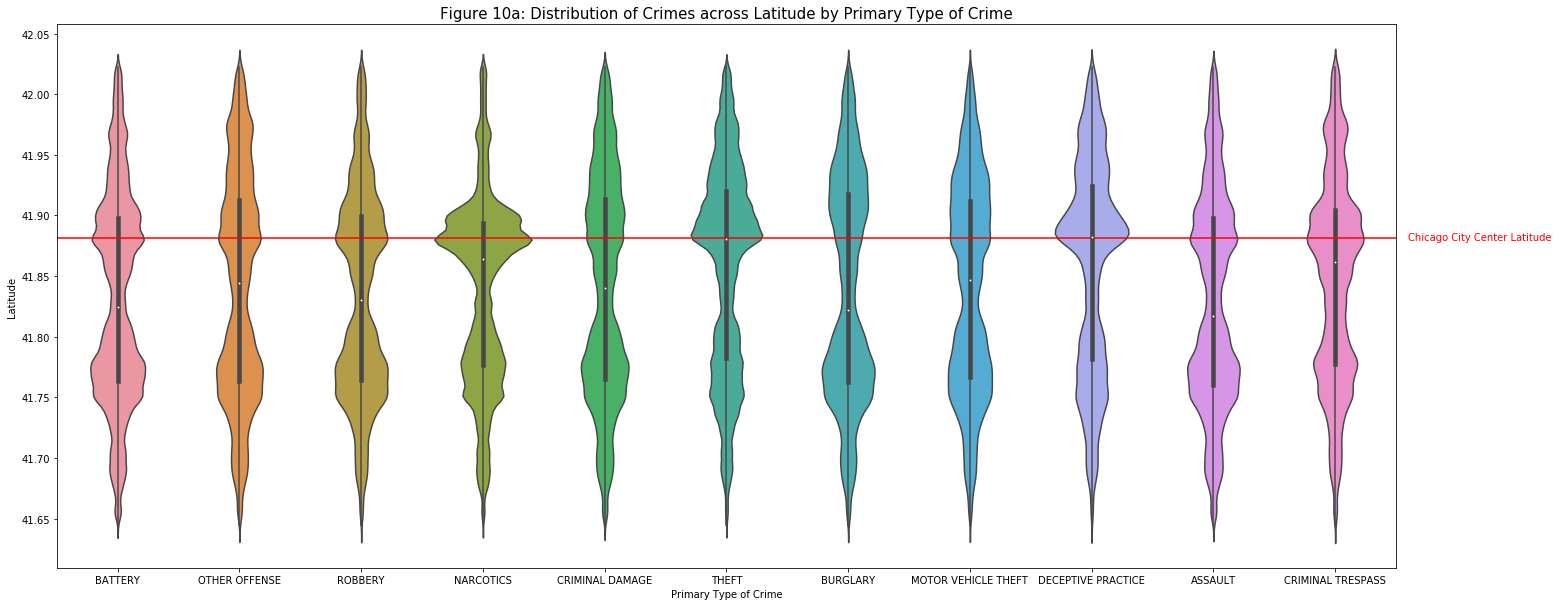

In [16]:
chicago_lat = 41.881832

fig, ax = plt.subplots()
fig.set_size_inches(24, 10)
_ = sns.violinplot(x='Primary Type', y = 'Latitude', data=crime_df, ax=ax)
_ = plt.xlabel('Primary Type of Crime')
_ = plt.axhline(y=chicago_lat, color='r', linestyle='-')
_ = plt.text(10.6, 41.88, 'Chicago City Center Latitude', color='red')
_ = plt.title('Figure 10a: Distribution of Crimes across Latitude by Primary Type of Crime', size=15)

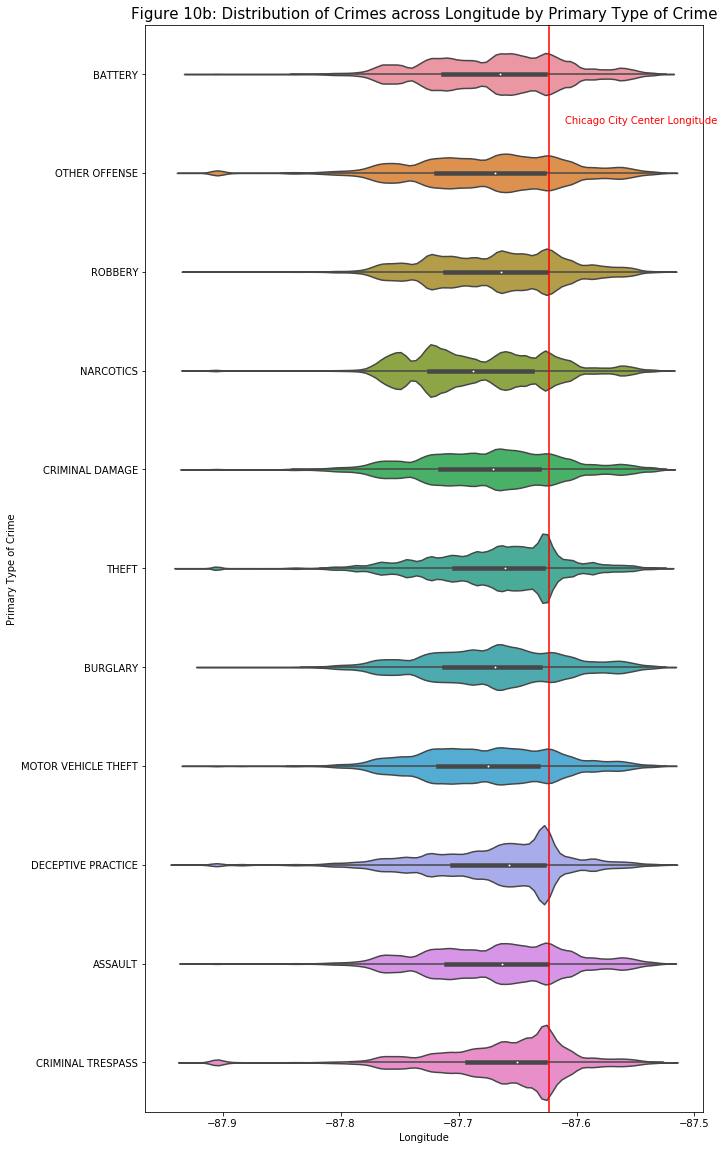

In [17]:
chicago_lon = -87.623177

fig, ax = plt.subplots()
fig.set_size_inches(10, 20)
_ = sns.violinplot(x='Longitude', y = 'Primary Type', data=crime_df, ax=ax)
_ = plt.xlabel('Longitude')
_ = plt.ylabel('Primary Type of Crime')
_ = plt.axvline(x=chicago_lon, color='r', linestyle='-')
_ = plt.text(-87.61, 0.5, 'Chicago City Center Longitude', color='red')
_ = plt.title('Figure 10b: Distribution of Crimes across Longitude by Primary Type of Crime', size=15)

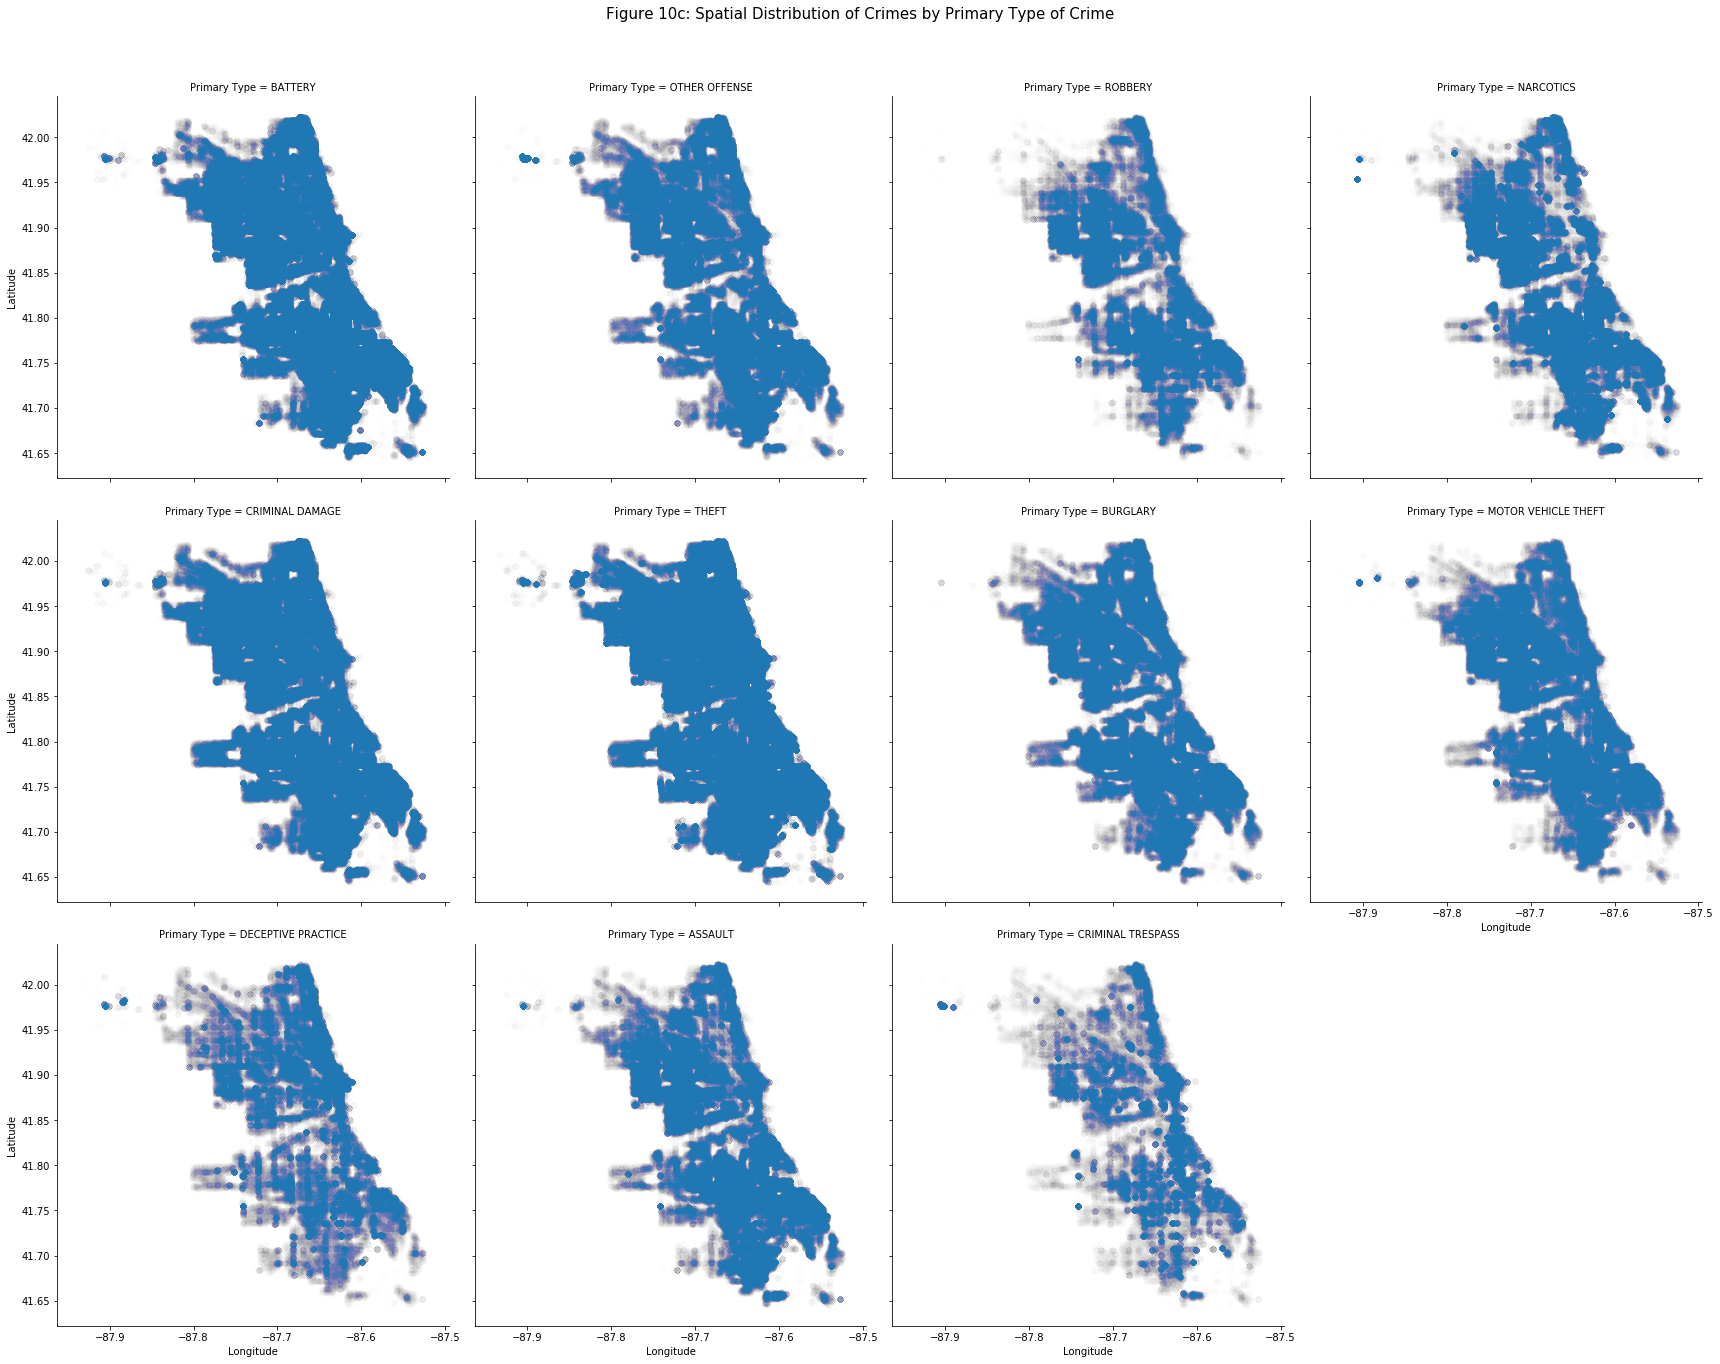

In [97]:
_ = sns.lmplot(x = 'Longitude', y = 'Latitude', data = crime_df, col = 'Primary Type', col_wrap = 4, height = 6, aspect = 1, legend=False, fit_reg = False, scatter_kws={'alpha':0.002})
_ = plt.suptitle('Figure 10c: Spatial Distribution of Crimes by Primary Type of Crime', y = 1.05, size = 15)

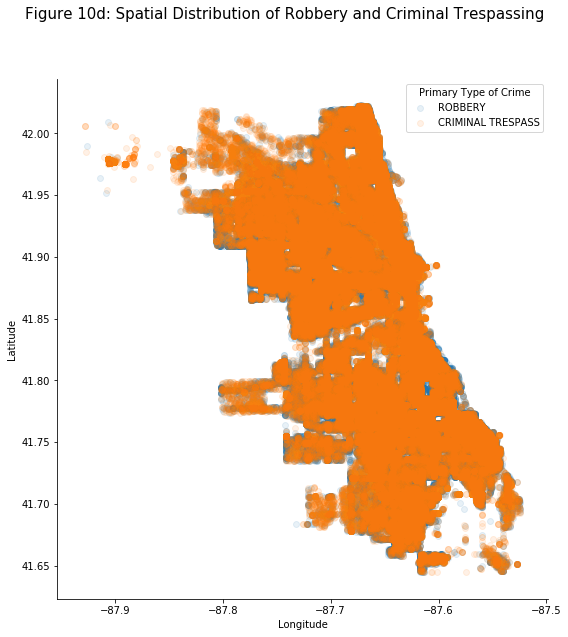

In [98]:
# Creating a combination plot of the 2 less frequent crime types
crime_2 = crime_df[[each in ['ROBBERY', 'CRIMINAL TRESPASS'] for each in crime_df['Primary Type']]]

_ = sns.lmplot(x = 'Longitude', y = 'Latitude', data = crime_2, hue = 'Primary Type', legend = False, height = 8, aspect = 1, fit_reg = False, scatter_kws={'alpha':0.1})
_ = plt.legend(title='Primary Type of Crime')
_ = plt.suptitle('Figure 10d: Spatial Distribution of Robbery and Criminal Trespassing', y = 1.1, size = 15)

## Distance from Chicago City Center

Figure 11 shows that for crimes involving theft, deceptive practice, and criminal trespassing, there is an relatively higher concentration of crimes closer to the city center of Chicago.  For theft and deceptive practice, the number of crimes decrease at about 3km away from the city center and then increase, becoming uniform from 5 to 15km away from the city center before decreasing.  for criminal trespassing, the number of crimes are generally steady until approximately 15km away from the city center.

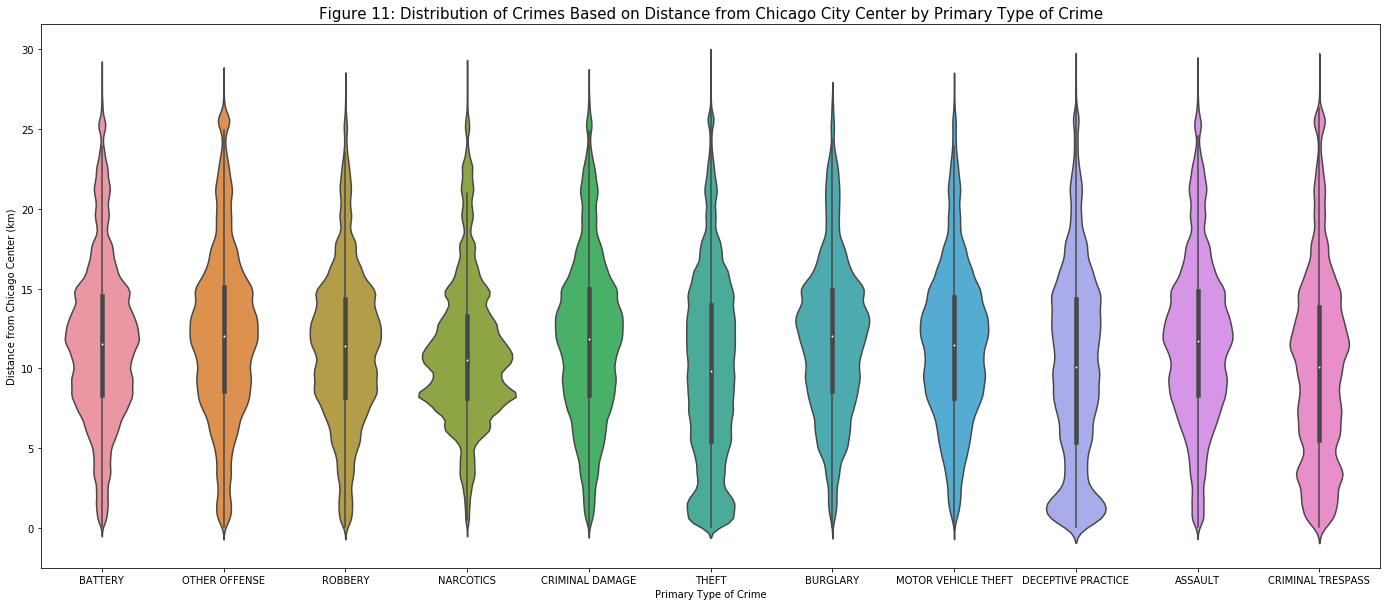

In [31]:
fig, ax = plt.subplots()
fig.set_size_inches(24, 10)
_ = sns.violinplot(x='Primary Type', y = 'Distance from Chicago (km)', data=crime_df, ax=ax)
_ = plt.xlabel('Primary Type of Crime')
_ = plt.ylabel('Distance from Chicago Center (km)')
_ = plt.title('Figure 11: Distribution of Crimes Based on Distance from Chicago City Center by Primary Type of Crime', size=15)

## Distance from Closest Police Station

In Figure 12a, there isn't much difference between the number of crimes and the distance from the closest police station for each type of crime.  Figure 12b is not exactly the same as Figure 3a, which shows the number of crimes by police district, but they show some similar patterns.  For example, districts 11 and 15 still have the highest number of crimes involving narcotics and district 18 still has the highest number of crimes involving theft.  The distance from the closest police station and the closest police station district therefore may not add additional value to predicting the type of crime. 

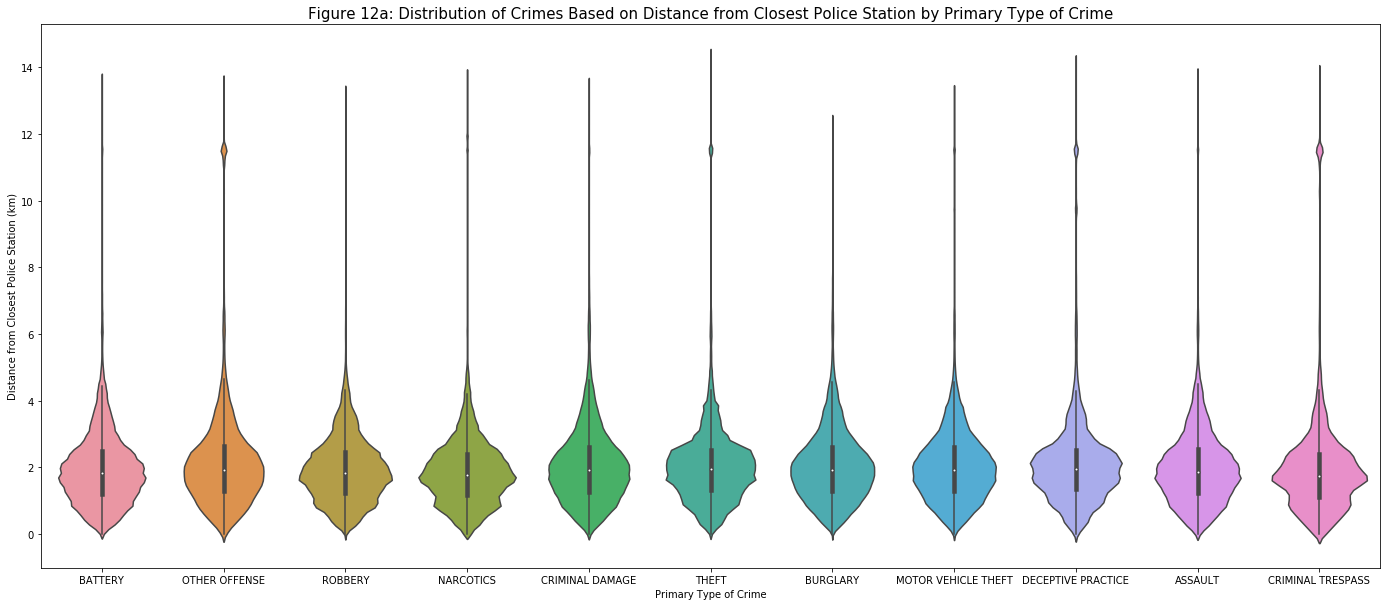

In [32]:
fig, ax = plt.subplots()
fig.set_size_inches(24, 10)
_ = sns.violinplot(x='Primary Type', y = 'Distance to Closest Police Station (km)', data=crime_df, ax=ax)
_ = plt.xlabel('Primary Type of Crime')
_ = plt.ylabel('Distance from Closest Police Station (km)')
_ = plt.title('Figure 12a: Distribution of Crimes Based on Distance from Closest Police Station by Primary Type of Crime', size=15)

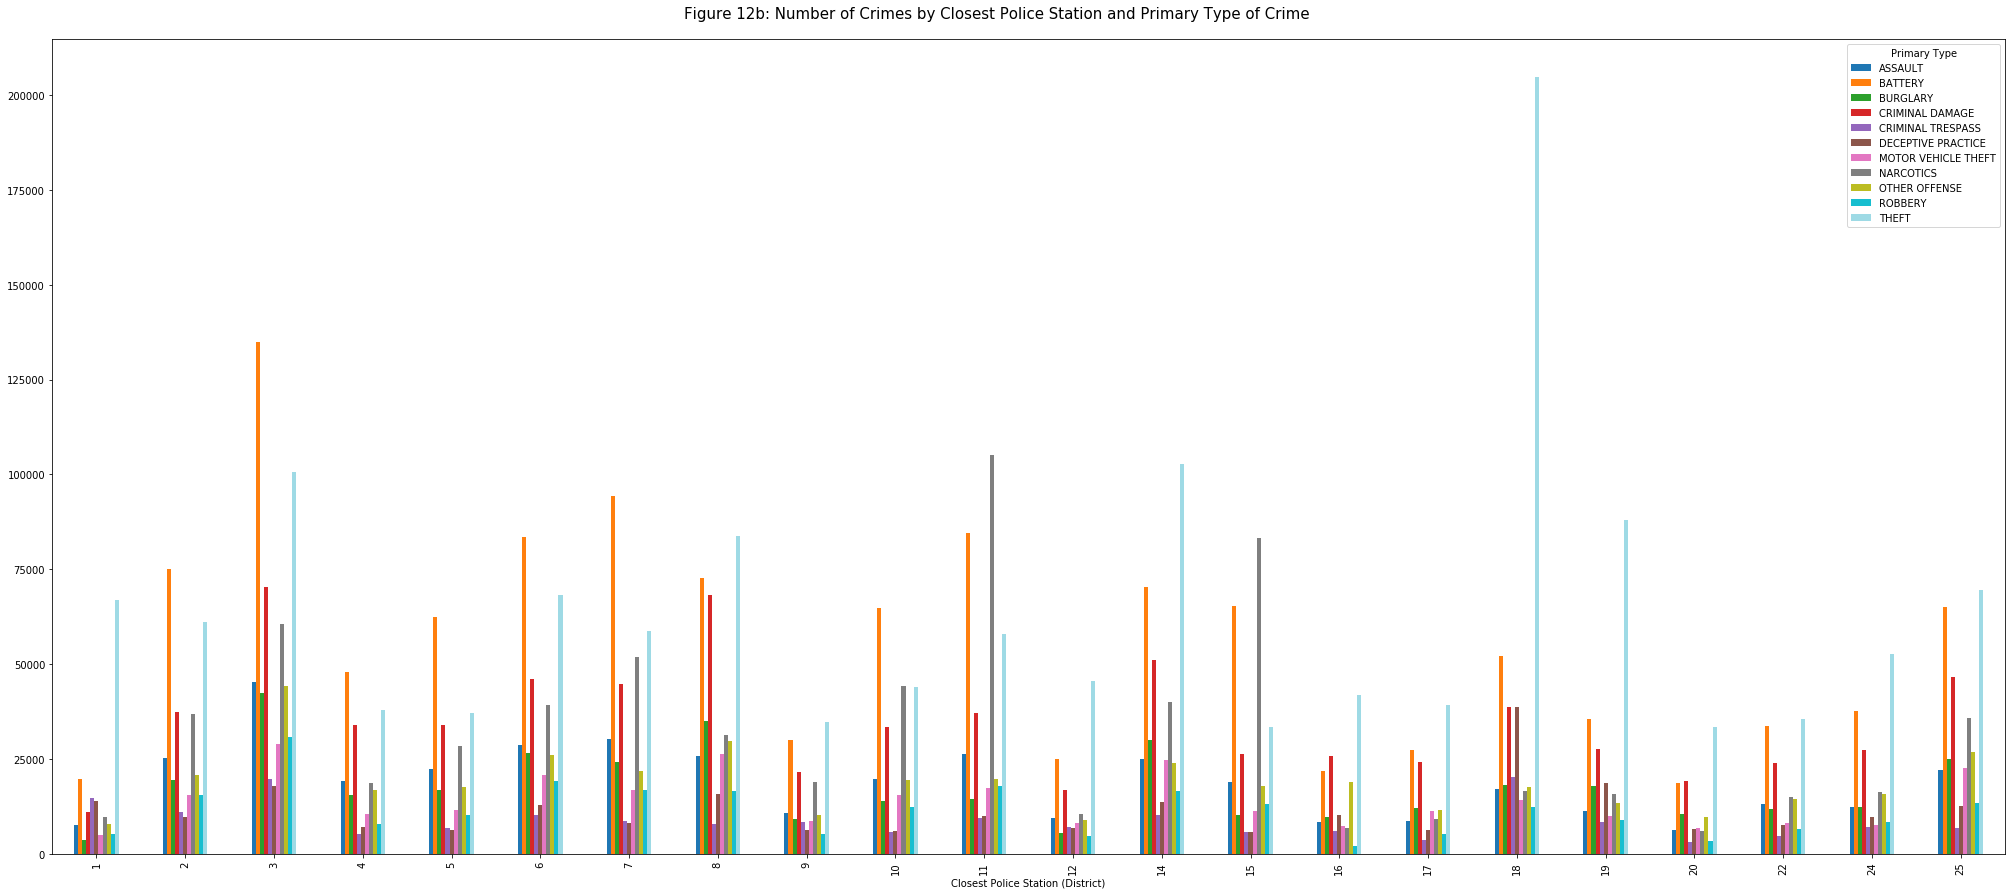

In [100]:
# Getting number of crimes based on the closest police station and converting to a dataframe
crime_df_close = crime_df.pivot_table(index = 'Closest Police Station (District)', columns = 'Primary Type', values = 'Date', aggfunc = len)
crime_df_close.index = crime_df_close.index.astype('int')

# Making a bar plot of the number of crimes per police district
ax1 = crime_df_close.plot.bar(figsize = (35,15), subplots = False, legend = True, colormap = 'tab20', stacked=False)
_ = plt.suptitle('Figure 12b: Number of Crimes by Closest Police Station and Primary Type of Crime', y = 0.91, size = 15)

## Distance from Closest Train Stop

Figure 13a shows that there is a higher concentration of crimes involving theft, deceptive practice, and criminal trespassing closer to train stops.  This may be a useful variable to predict the type of crime, but it could possibly be redundant as a similar pattern was seen when looking at the distance from the city center of Chicago (Figure 11). 

According to Figure 13b, the most crimes occurred near the green line and red line and the fewest occurred near the yellow line.  The highest number of crimes involving battery occurred near the green line while the highest number of crimes involving theft occurred near the red line.  

Figure 13c shows that certain train lines have a higher proportion of theft; for example stops associated with the brown, green, orange, purple, and pink lines.  Stops associated with the blue, brown, green, orange, purple, and pink lines have the highest proportion of deceptive practice.  Stops associated with the yellow line have the highest proportion of criminal damage. However, this may not be significant since there are relatively few crimes close to these lines. Looking at just the blue line, green line, and red line, they have different distributions of crimes. It is possible that there could be some relationship between the train line and and the type of crime.

It likely won't be useful to use the train stops to predict the type of crime as Figure 13d shows that the distribution of crimes across the train stops for each primary type of crime is similar. 

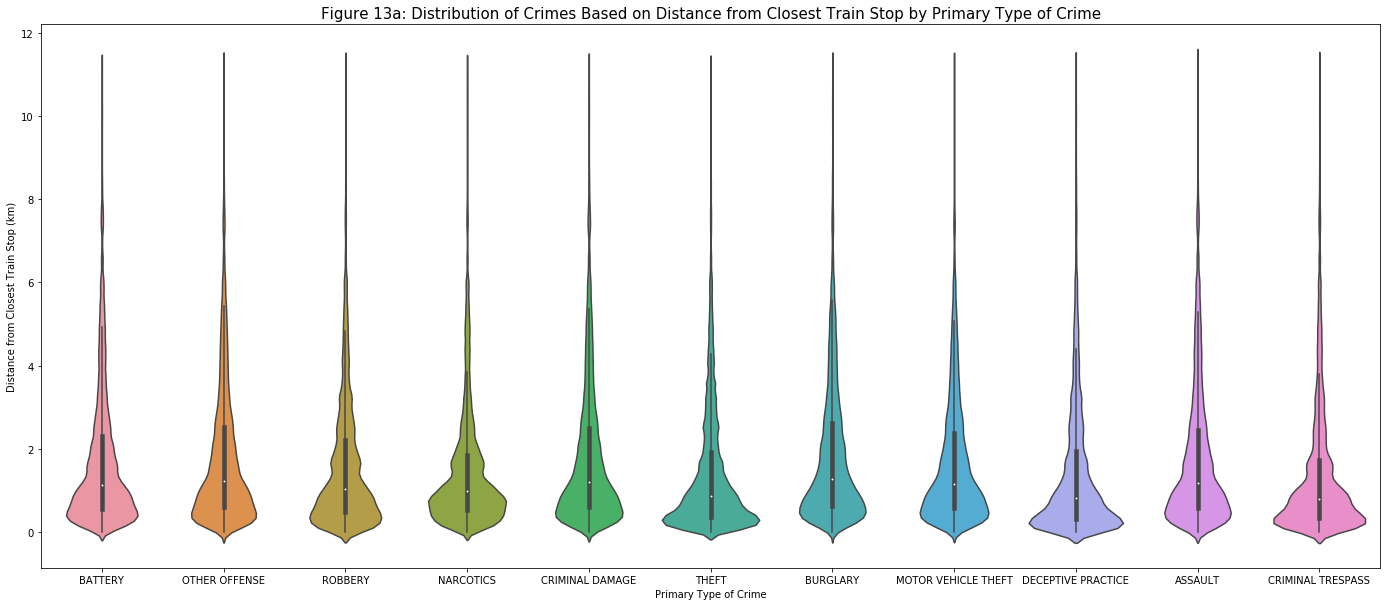

In [52]:
fig, ax = plt.subplots()
fig.set_size_inches(24, 10)
_ = sns.violinplot(x='Primary Type', y = 'Distance to Closest Train Stop (km)', data=crime_df, ax=ax)
_ = plt.xlabel('Primary Type of Crime')
_ = plt.ylabel('Distance from Closest Train Stop (km)')
_ = plt.title('Figure 13a: Distribution of Crimes Based on Distance from Closest Train Stop by Primary Type of Crime', size=15)

Text(0.5,0.91,'Figure 13b: Number of Crimes by Train Line and Primary Type of Crime')

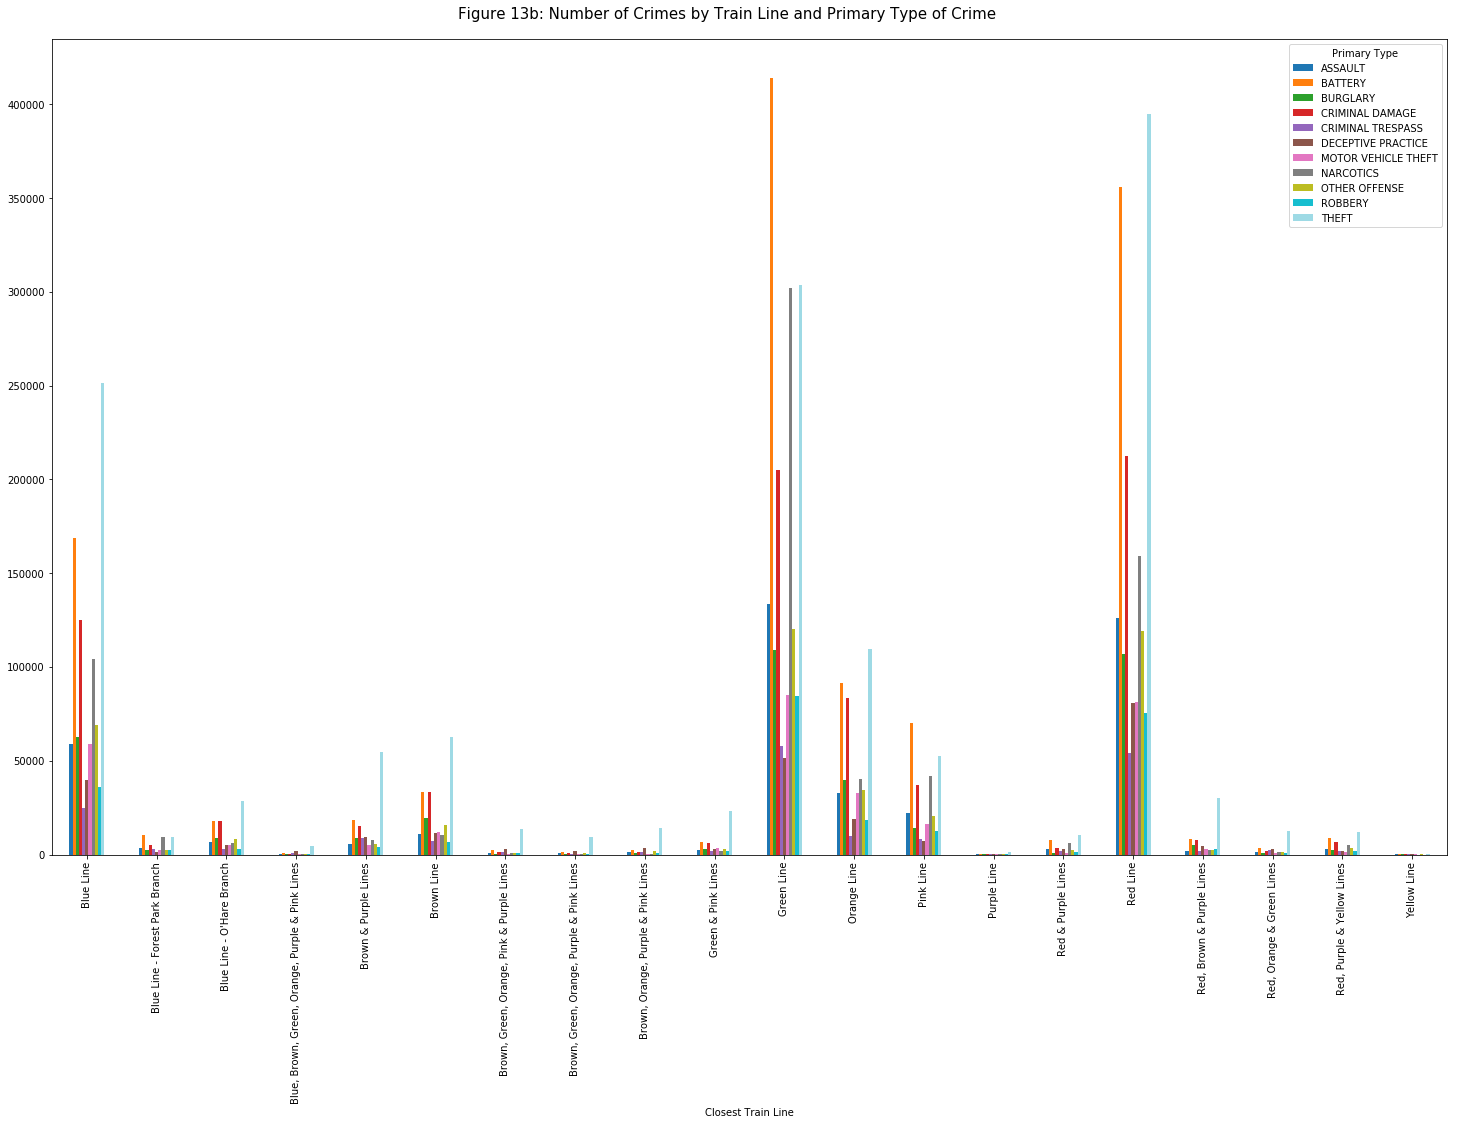

In [53]:
# Getting number of crimes based on the closest train line and converting to a dataframe
crime_df_trainline = crime_df.pivot_table(index = 'Closest Train Line', columns = 'Primary Type', values = 'Date', aggfunc = len)

# Making a bar plot of the number of crimes based on the closest train line 
ax = crime_df_trainline.plot.bar(figsize = (25,15), subplots = False, legend = True, colormap = 'tab20')
plt.suptitle('Figure 13b: Number of Crimes by Train Line and Primary Type of Crime', y = 0.91, size = 15)

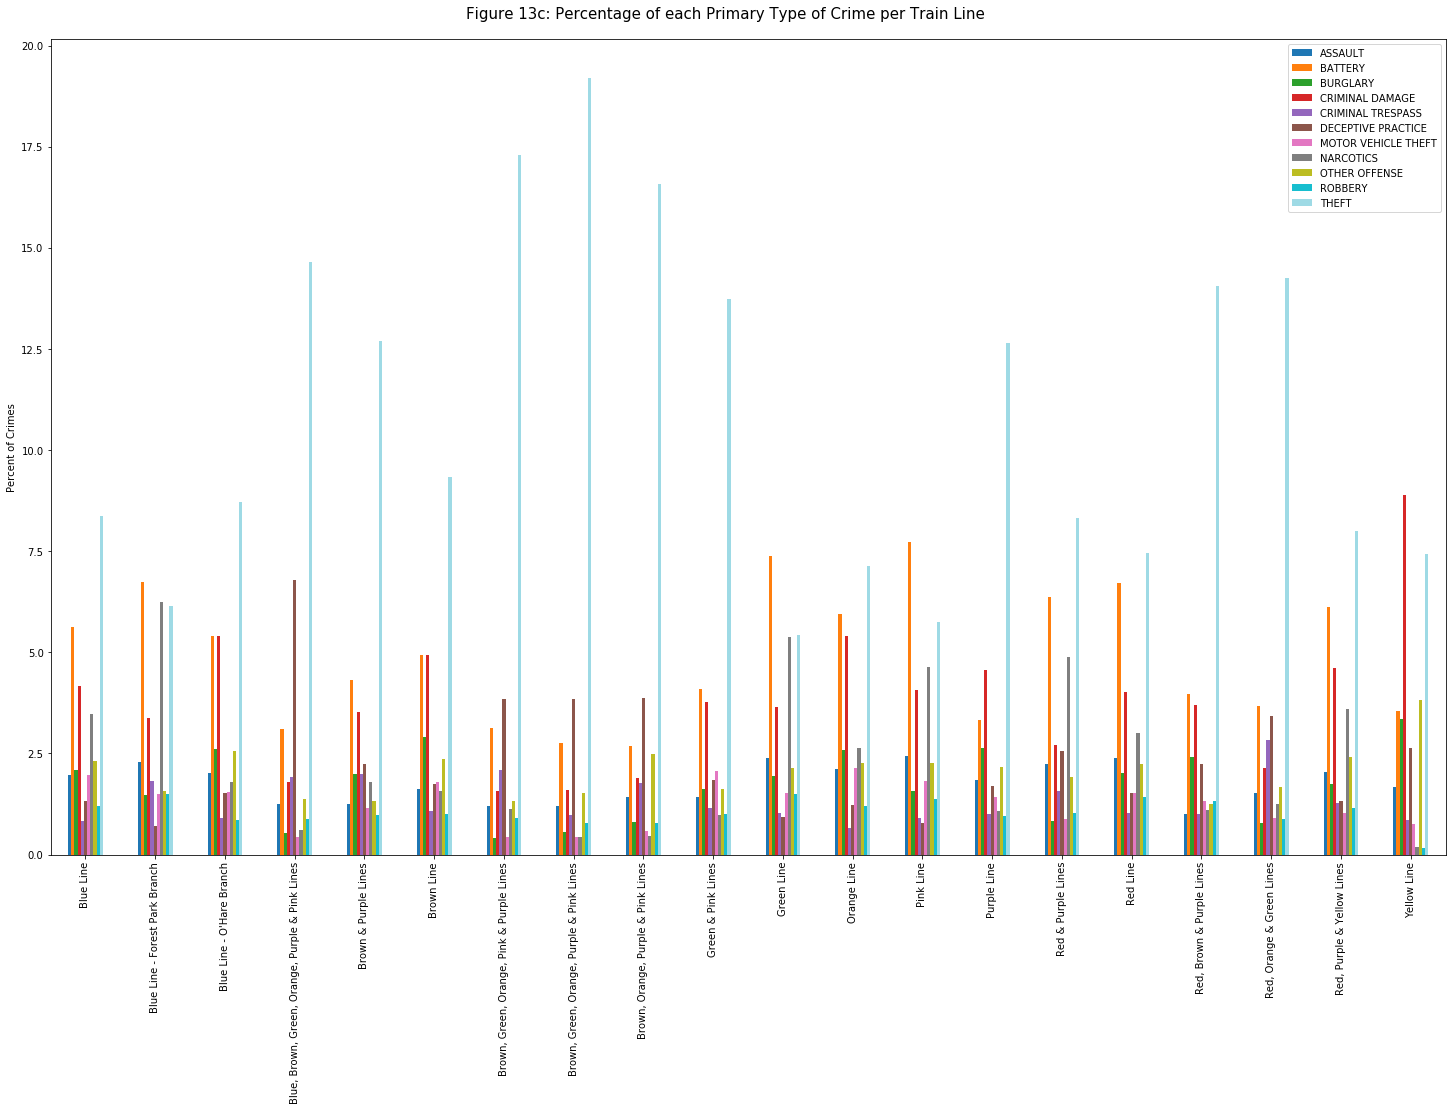

In [72]:
# Calculating the proportion of crimes within each train line
crime_df_trainline['Totals'] = crime_df_trainline.sum(axis=1)
crime_df_trainline_prop = pd.DataFrame()
for r in crime_df_trainline.index: 
    for c in crime_df_trainline.columns:
        if c != 'Totals':
            crime_df_trainline_prop.loc[r, c] = crime_df_trainline.loc[r, c] * 100 / crime_df_trainline.loc[r, 'Totals']
            
# Making a bar plot of the proportion of crimes per closest train line 
ax = crime_df_trainline_prop.plot.bar(figsize = (25,15), subplots = False, legend = True, colormap = 'tab20')
_ = plt.suptitle('Figure 13c: Percentage of each Primary Type of Crime per Train Line', y = 0.91, size = 15)
_ = plt.ylabel('Percent of Crimes')

Number of Unique Train Stops:  100


Text(0.5,0.91,'Figure 13d: Number of Crimes by Train Stop and Primary Type of Crime')

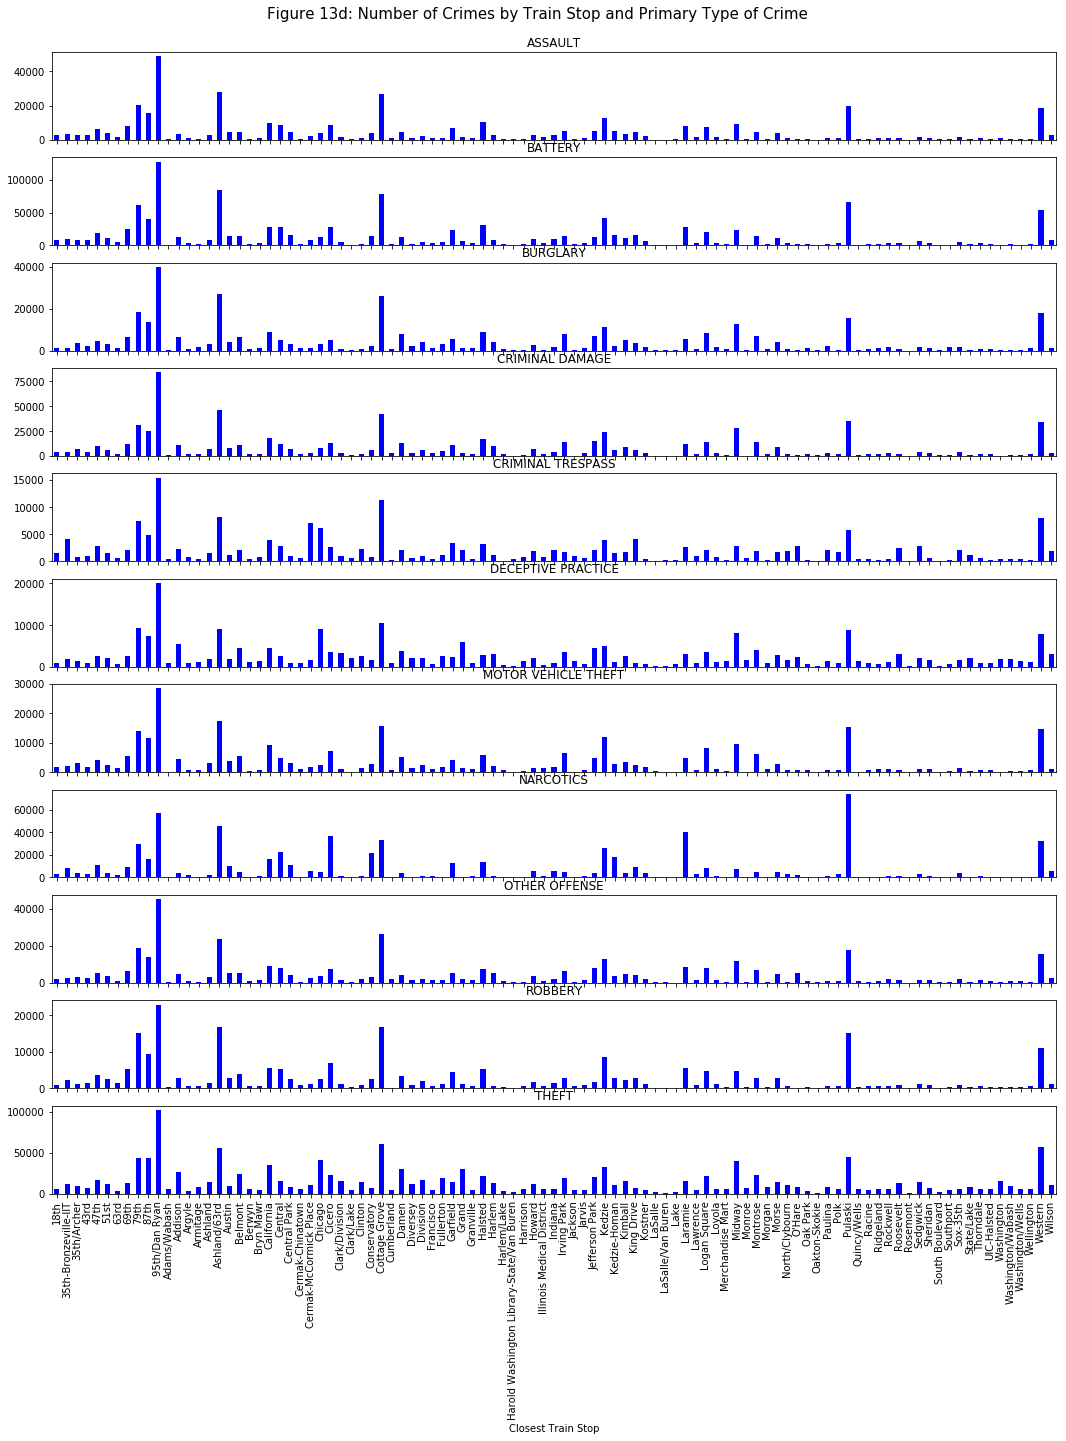

In [87]:
# Getting number of crimes based on the closest train stop and converting to a dataframe
crime_df_trainstop = crime_df.pivot_table(index = 'Closest Train Stop', columns = 'Primary Type', values = 'Date', aggfunc = len)

num_stops = len(set(crime_df['Closest Train Stop']))
print('Number of Unique Train Stops: ', num_stops)

# Making a bar plot of the number of crimes based on the closest train stop 
ax = crime_df_trainstop.plot.bar(figsize = (18,21), subplots = True, color='blue', legend=False)
plt.suptitle('Figure 13d: Number of Crimes by Closest Train Stop and Primary Type of Crime', y = 0.91, size = 15)

## Distance from Closest Bus Stop

Figure 14a shows that for all crime types, the highest concentration of crimes is found close to bus stops. This is especially true for robbery.  The distance from the closest bus stop could be slightly useful in predicting the type of crime. 

Looking at Figure 14b, it is possible that the bus stop could be somewhat useful to predict the type of crime.  For example the stop at State and Washington has relatively high counts for theft but not for any othe crime type.  However, as there are 5,832 unique bus stops, this would not be feasible. 

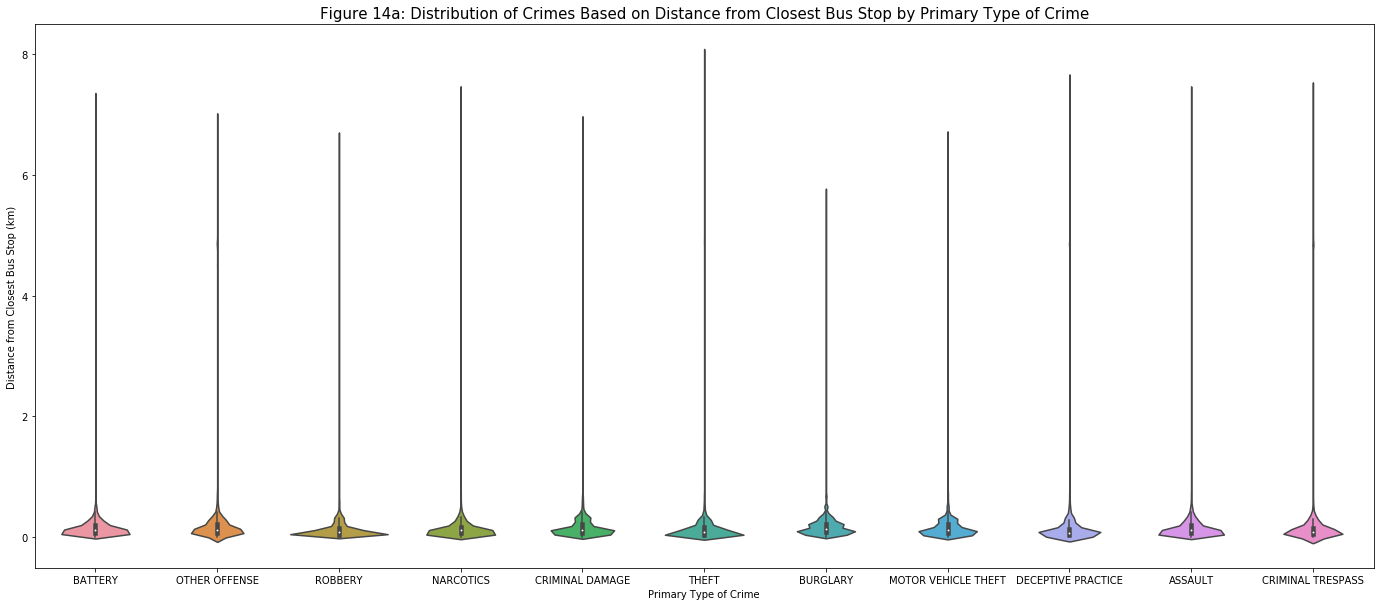

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(24, 10)
_ = sns.violinplot(x='Primary Type', y = 'Distance to Closest Bus Stop (km)', data=crime_df, ax=ax)
_ = plt.xlabel('Primary Type of Crime')
_ = plt.ylabel('Distance from Closest Bus Stop (km)')
_ = plt.title('Figure 14a: Distribution of Crimes Based on Distance from Closest Bus Stop by Primary Type of Crime', size=15)

Number of Unique Bus Stops:  5832


Text(0.5,0.91,'Figure 14b: Number of Crimes by Closest Bus Stop and Primary Type of Crime')

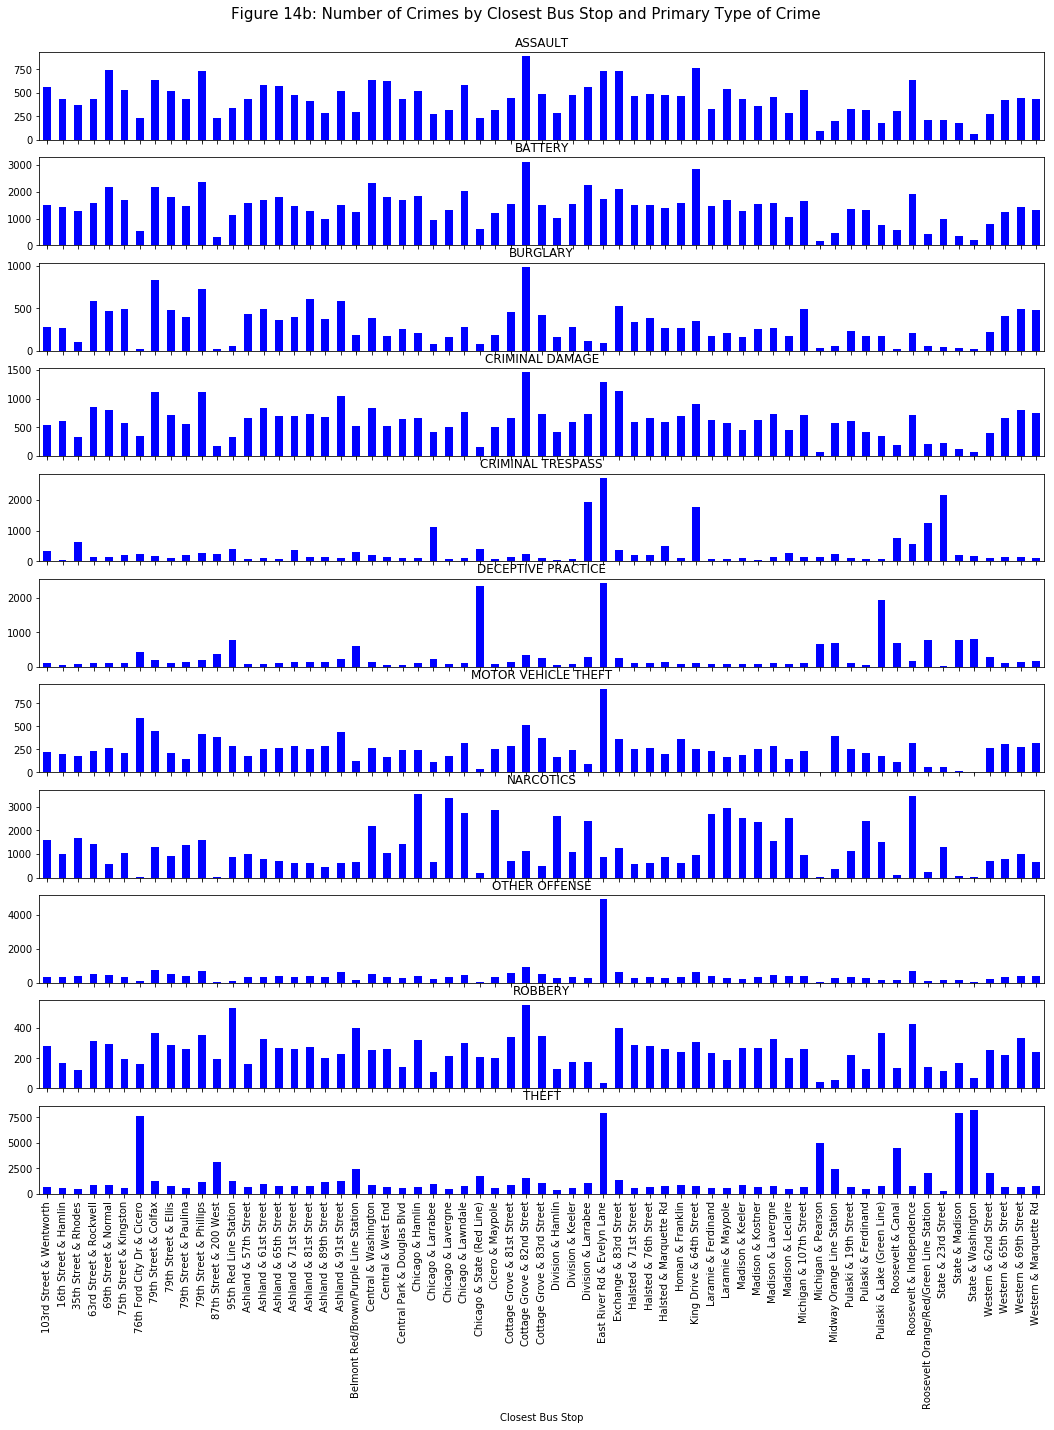

In [102]:
# Getting number of crimes based on the closest bus stop and converting to a dataframe
crime_df_busstop = crime_df.pivot_table(index = 'Closest Bus Stop', columns = 'Primary Type', values = 'Date', aggfunc = len)

num_stops = len(set(crime_df['Closest Bus Stop']))
print('Number of Unique Bus Stops: ', num_stops)

# Making a bar plot of the number of crimes based on the closest bus stop.  As there are many bus stops, looking at ones with over 5000 crimes
ax = crime_df_busstop[crime_df_busstop.sum(axis = 1) >= 5000].plot.bar(figsize = (18,21), subplots = True, color='blue', legend=False)
plt.suptitle('Figure 14b: Number of Crimes by Closest Bus Stop and Primary Type of Crime', y = 0.91, size = 15)

## Distance from Closest Liquor Store

Figure 15a shows that for all crime types, the highest concentration of crimes is found close to liquor stores.  The distance from the closest liquor store may not be useful in predicting the type of crime as there are no significant differences in the distributions for each crime type. 

Figure 15b shows that there may be a slight relationship between the closest liquor store and the type of crime.  For example, crimes near Bennett & Bennett Special Wines tend to be theft.  This, however, could just have to do with where this store is located rather than just the store itself.  Also, as there are 564 unique liquor stores, this variable may not be feasible to use. 

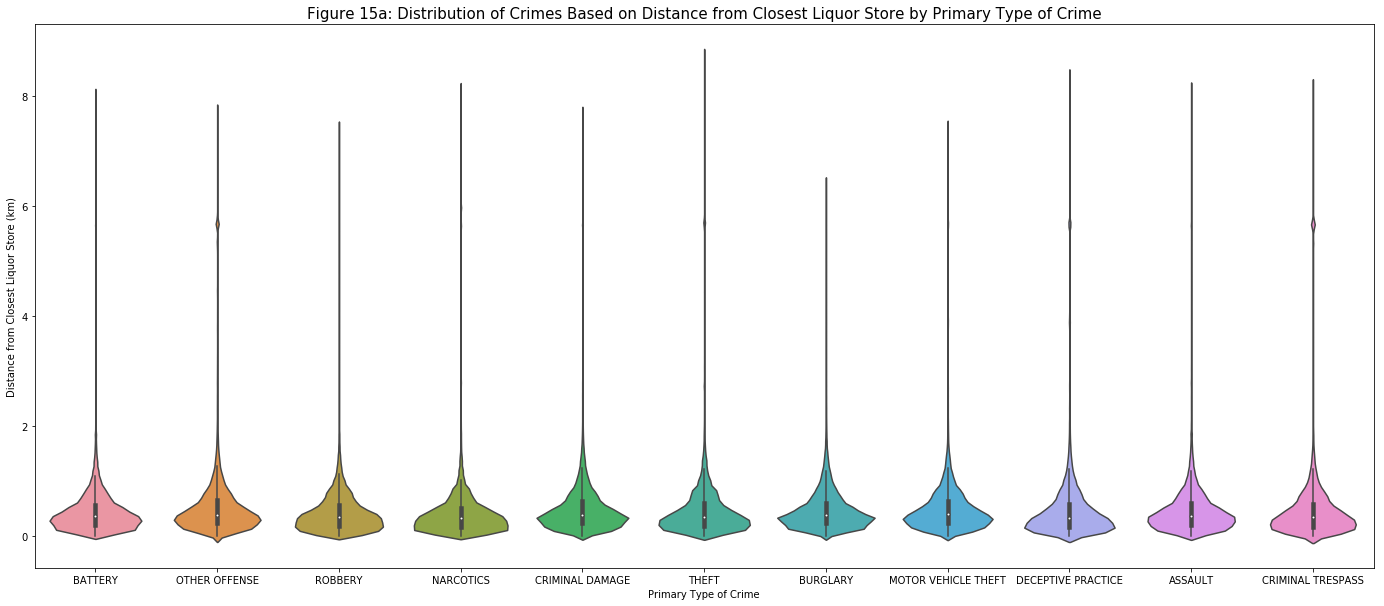

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(24, 10)
_ = sns.violinplot(x='Primary Type', y = 'Distance to Closest Liquor Store (km)', data=crime_df, ax=ax)
_ = plt.xlabel('Primary Type of Crime')
_ = plt.ylabel('Distance from Closest Liquor Store (km)')
_ = plt.title('Figure 15a: Distribution of Crimes Based on Distance from Closest Liquor Store by Primary Type of Crime', size=15)

Number of Unique Liquor Stores:  564


Text(0.5,0.91,'Figure 15b: Number of Crimes by Closest Liquor Store and Primary Type of Crime')

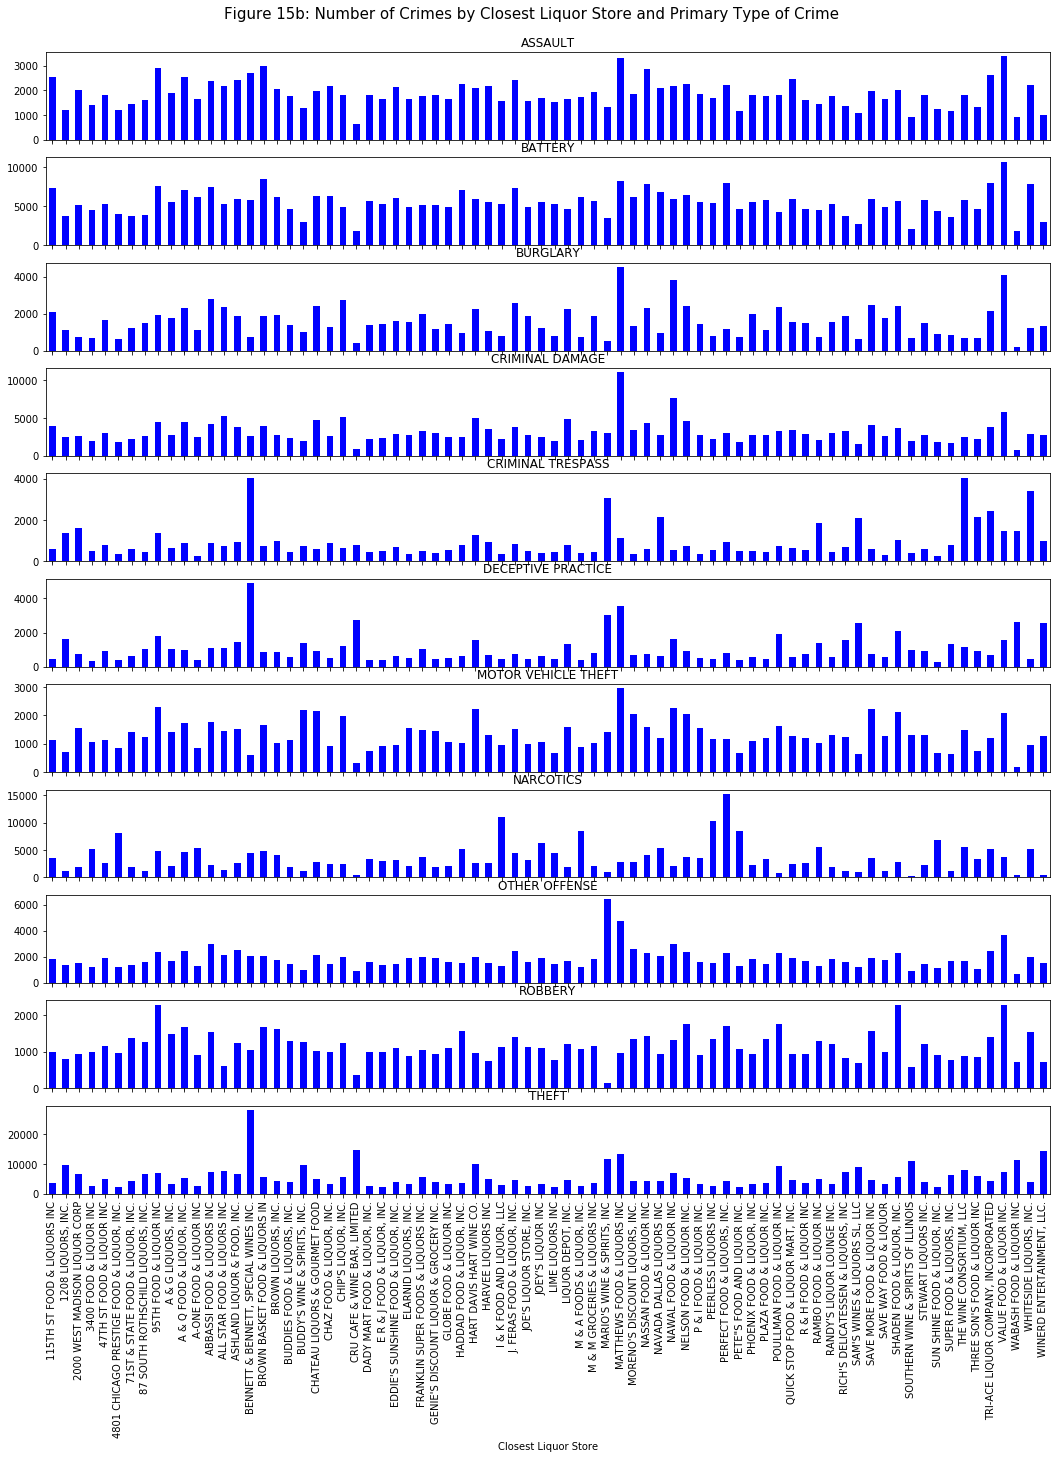

In [26]:
# Getting number of crimes based on the closest liquor store and converting to a dataframe
crime_df_liquor = crime_df.pivot_table(index = 'Closest Liquor Store', columns = 'Primary Type', values = 'Date', aggfunc = len)

num_stores = len(set(crime_df['Closest Liquor Store']))
print('Number of Unique Liquor Stores: ', num_stores)

# Making a bar plot of the number of crimes based on the closest liquor store
ax = crime_df_liquor[crime_df_liquor.sum(axis=1) >= 20000].plot.bar(figsize = (18,21), subplots = True, color='blue', legend=False)
plt.suptitle('Figure 15b: Number of Crimes by Closest Liquor Store and Primary Type of Crime', y = 0.91, size = 15)

## Quarter of the Year

Figure 16a shows that the number of crimes involving theft are at a minimum during the first quarter of the year and at a maximum during the third quarter of the year.  The number of crimes involving battery increase from the first to second quarter and then remains steady through the third quarter before decreasing in the fourth quarter.  During the first quarter, crimes involving narcotics surpass those involving criminal damage.  Criminal damage then surpasses narcotics for the remainder of the year. 

Figure 16b shows a slighly higher proportion of crimes involving narcotics in the first quarter and a slightly higher proportion of crimes involving battery in the second and third quarters. 

It is possible that the quarter of the year may have a very slight relationship with the type of crime.  

In [20]:
# Creating a column with the year of the reported crime
crime_df['Year'] = list(map(lambda i: i.year, crime_df['Date']))

Text(0.75,0.96,'Q1 = January, February, March\nQ2 = April, May, June\nQ3 = July, August, September\nQ4 = October, November, December')

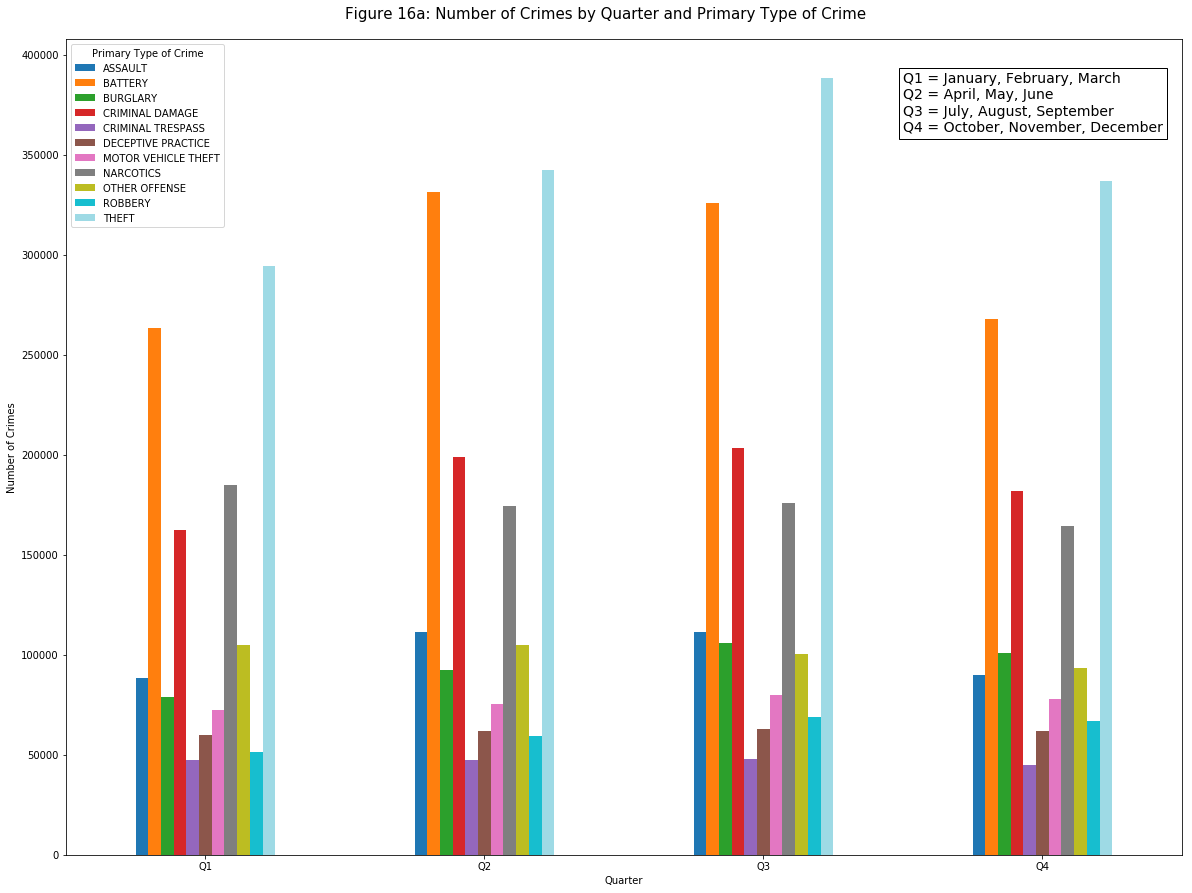

In [28]:
# Getting number of crimes per quarter and converting to a dataframe. Leaving out year 2018 as it is partial.  
crime_df_quarter = crime_df[crime_df['Year'] != 2018].pivot_table(index = 'Quarter', columns = 'Primary Type', values = 'Date', aggfunc = len)

# Making a bar plot of the number of crimes per quarter
ax = crime_df_quarter.plot.bar(figsize = (20, 15), subplots = False, legend = True, cmap = 'tab20', rot=0)
plt.legend(title='Primary Type of Crime')
plt.suptitle('Figure 16a: Number of Crimes by Quarter and Primary Type of Crime', y = 0.91, size = 15)
plt.ylabel('Number of Crimes')

# Text Box
text = 'Q1 = January, February, March\nQ2 = April, May, June\nQ3 = July, August, September\nQ4 = October, November, December'
props = dict(boxstyle='square', facecolor='white')
ax.text(0.75, 0.96, text, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

Text(0.5,0.95,'Figure 16b: Number of Crimes by Quarter and Primary Type of Crime')

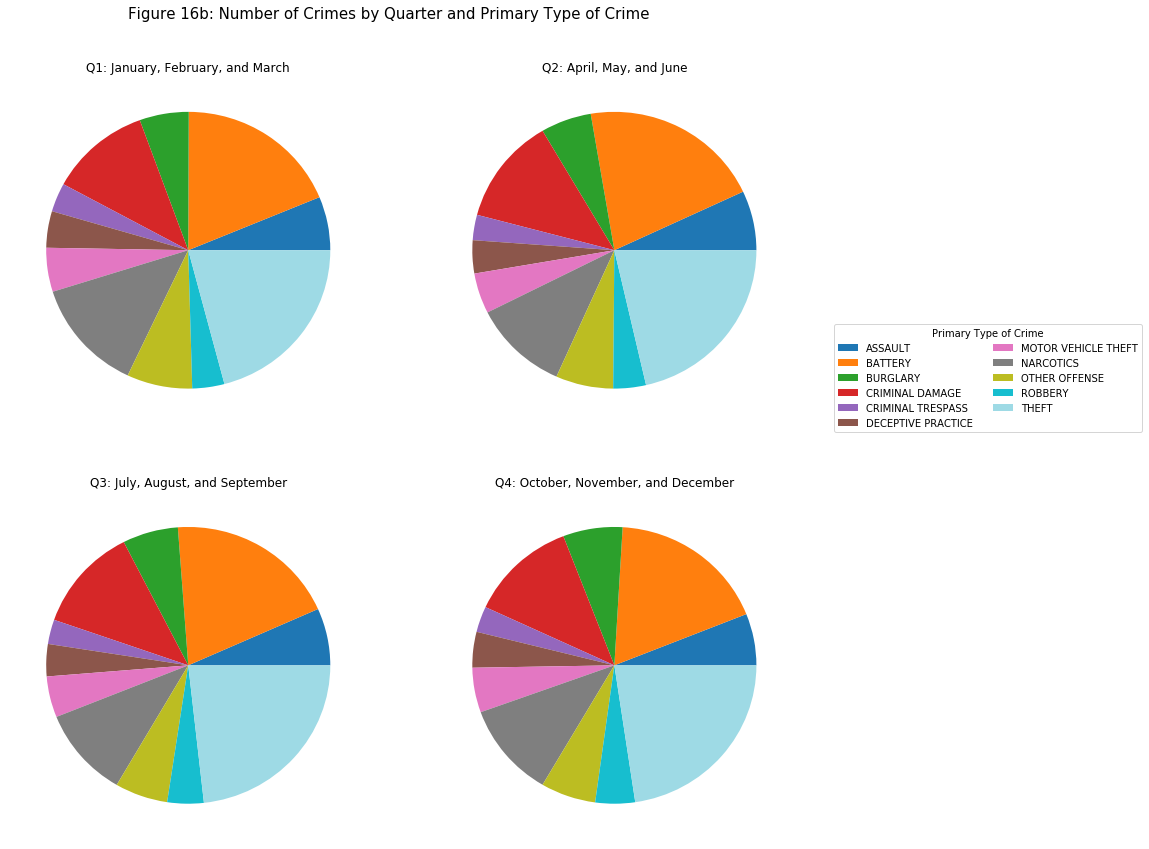

In [33]:
# Making pie charts for each quarter
cmap = plt.cm.tab20
colors = cmap(np.linspace(0., 1., 11))
labels = crime_df_quarter.columns

fig, axes = plt.subplots(2, 2, figsize = (14,14))

axes[0,0].pie(crime_df_quarter.iloc[0,:], colors = colors)
axes[0,0].set_title('Q1: January, February, and March')

axes[0,1].pie(crime_df_quarter.iloc[1,:], colors = colors)
axes[0,1].set_title('Q2: April, May, and June')
    
axes[1,0].pie(crime_df_quarter.iloc[2,:], colors = colors)
axes[1,0].set_title('Q3: July, August, and September')

axes[1,1].pie(crime_df_quarter.iloc[3,:], colors = colors)
axes[1,1].set_title('Q4: October, November, and December')

plt.legend(labels = labels, bbox_to_anchor=(2, 1.5), ncol = 2, prop={'size': 10}, title = 'Primary Type of Crime')
plt.suptitle('Figure 16b: Proportion of Crimes by Quarter and Primary Type of Crime', y = 0.95, size = 15)

## Season

Figures 17a and 17b show similar patterns as Figures 16a and 16b.  So there is not much of a difference between the relationship of the quarter of the year and season with the type of crime.  

Text(0,0.5,'Number of Crimes')

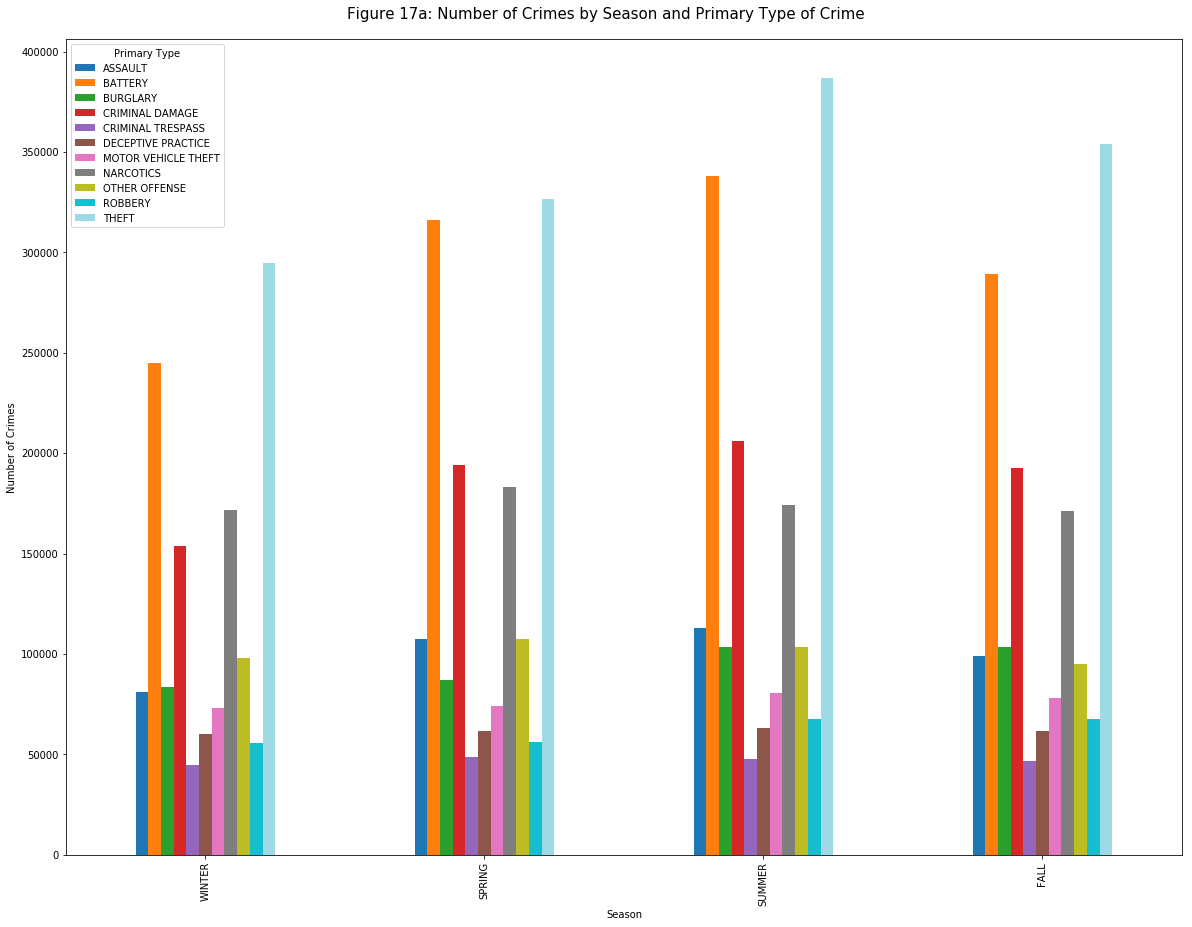

In [24]:
# Getting number of crimes per season and converting to a dataframe. Leaving out year 2018 as it is partial.  
crime_df_season = crime_df[crime_df['Year'] != 2018].pivot_table(index = 'Season', columns = 'Primary Type', values = 'Date', aggfunc = len)
crime_df_season = crime_df_season.reindex(['WINTER', 'SPRING', 'SUMMER', 'FALL'])

# Making a bar plot of the number of crimes per season
ax = crime_df_season.plot.bar(figsize = (20, 15), subplots = False, legend = True, cmap = 'tab20')
plt.suptitle('Figure 17a: Number of Crimes by Season and Primary Type of Crime', y = 0.91, size = 15)
plt.ylabel('Number of Crimes')

In [27]:
crime_df_season

Primary Type  ASSAULT  BATTERY  BURGLARY  CRIMINAL DAMAGE  CRIMINAL TRESPASS  \
Season                                                                         
WINTER          81095   245189     83761           153865              44684   
SPRING         107350   316216     87134           194109              48523   
SUMMER         113021   338095    103522           206319              47556   
FALL            99194   289086    103424           192882              46569   

Primary Type  DECEPTIVE PRACTICE  MOTOR VEHICLE THEFT  NARCOTICS  \
Season                                                             
WINTER                     60228                73158     171541   
SPRING                     61829                74249     183108   
SUMMER                     63161                80372     174030   
FALL                       61528                77874     171122   

Primary Type  OTHER OFFENSE  ROBBERY   THEFT  
Season                                        
WINTER                97902    55918  294697  
SPRING               107436    55971  326469  
SUMMER               103543    67713  386799  
FALL                  94872    67656  354157

Text(0.5,0.95,'Figure 17b: Proportion of Crimes by Season and Primary Type of Crime')

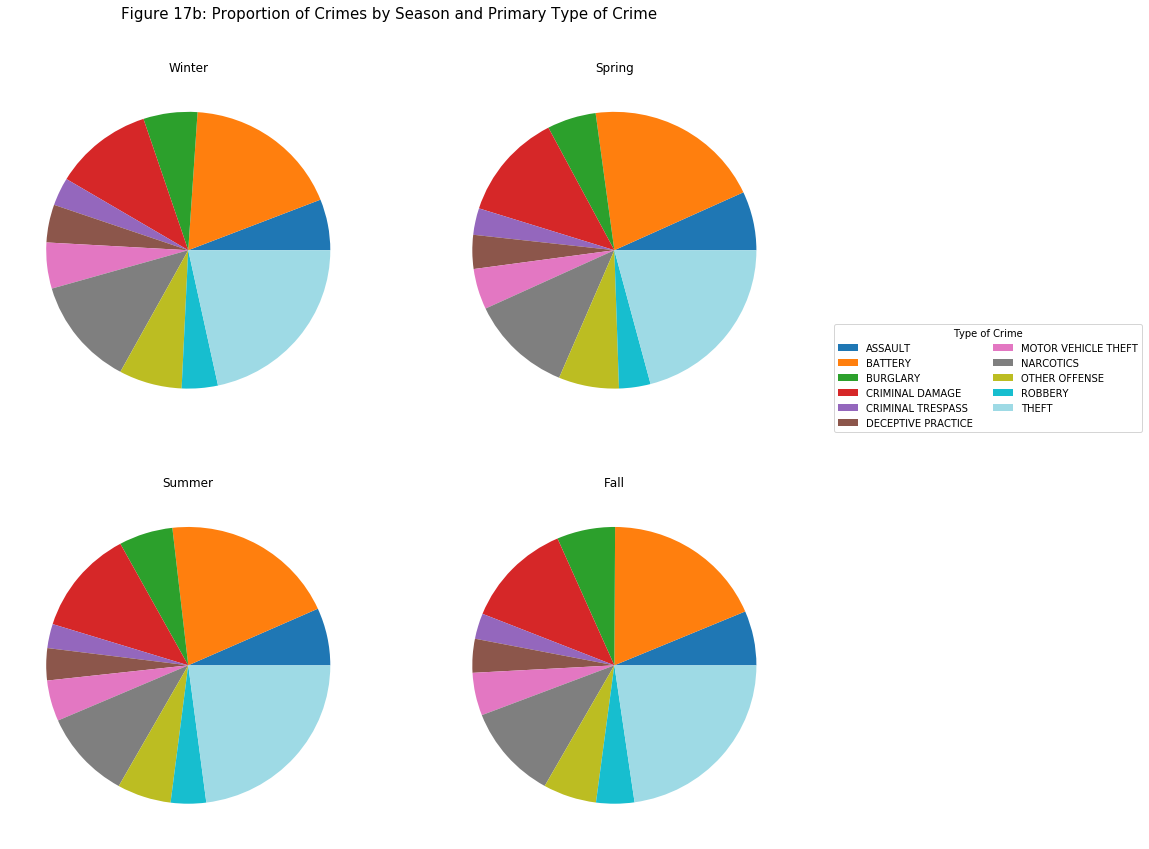

In [28]:
# Making pie charts for each season
cmap = plt.cm.tab20
colors = cmap(np.linspace(0., 1., 11))
labels = crime_df_season.columns

fig, axes = plt.subplots(2, 2, figsize = (14,14))

axes[0,0].pie(crime_df_season.iloc[0,:], colors = colors)
axes[0,0].set_title('Winter')

axes[0,1].pie(crime_df_season.iloc[1,:], colors = colors)
axes[0,1].set_title('Spring')
    
axes[1,0].pie(crime_df_season.iloc[2,:], colors = colors)
axes[1,0].set_title('Summer')

axes[1,1].pie(crime_df_season.iloc[3,:], colors = colors)
axes[1,1].set_title('Fall')

plt.legend(labels = labels, bbox_to_anchor=(2, 1.5), ncol = 2, prop={'size': 10}, title = 'Type of Crime')
plt.suptitle('Figure 17b: Proportion of Crimes by Season and Primary Type of Crime', y = 0.95, size = 15)


## Month

Figure 18a shows that the number of crimes involving theft are at a minimum during February and increase until July/August before decreasing into December/January.  Crimes involving battery are also at a minimum during February but only increase into May/June/July before decreasing. Crimes involving narcotics surpass those involving criminal damage during January/February/March. 

Figure 18b shows that July/August have the highest proportion of crimes involving theft while May/June have the highest proportion of crimes involving battery.  February has the highest proportion of crimes involving narcotics. 

There does seem to be some relationship between month and the type of crime, so the month would be useful. 

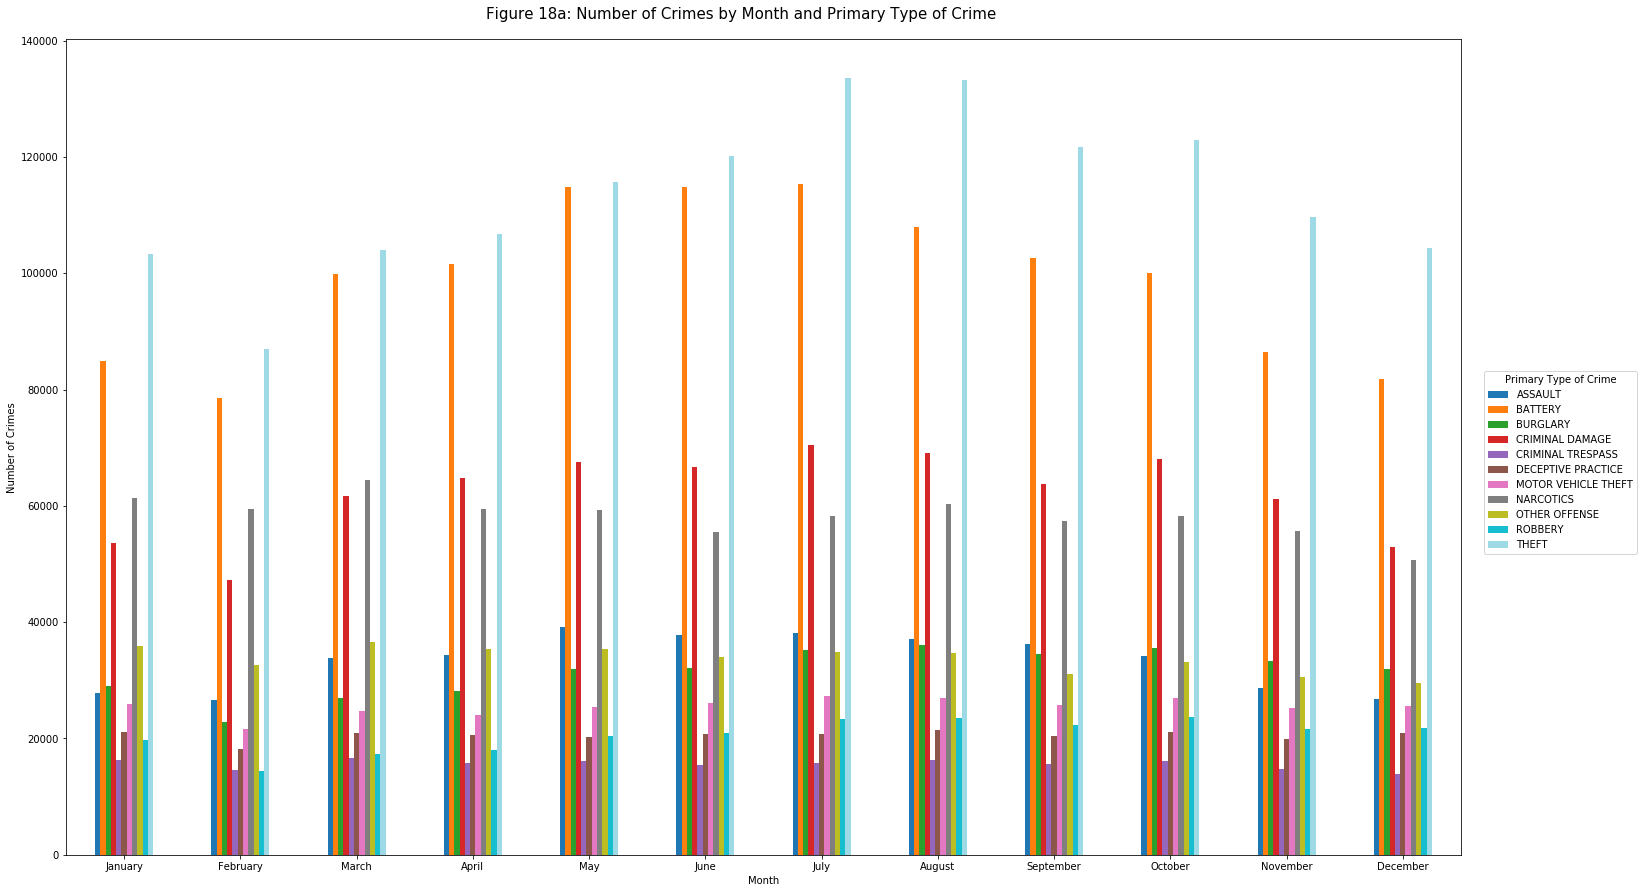

In [86]:
# Getting number of crimes per month and converting to a dataframe. Leaving out year 2018 as it is partial.  
crime_df_month = crime_df[crime_df['Year'] != 2018].pivot_table(index = 'Month', columns = 'Primary Type', values = 'Date', aggfunc = len)

# Making a bar plot of the number of crimes per month
ax = crime_df_month.plot.bar(figsize = (25, 15), subplots = False, legend = True, cmap = 'tab20', rot=0)
plt.suptitle('Figure 18a: Number of Crimes by Month and Primary Type of Crime', y = 0.91, size = 15)
plt.xticks(np.arange(0,12), ('January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'))
plt.ylabel('Number of Crimes')
plt.legend(title='Primary Type of Crime', bbox_to_anchor=(1.13, 0.6))

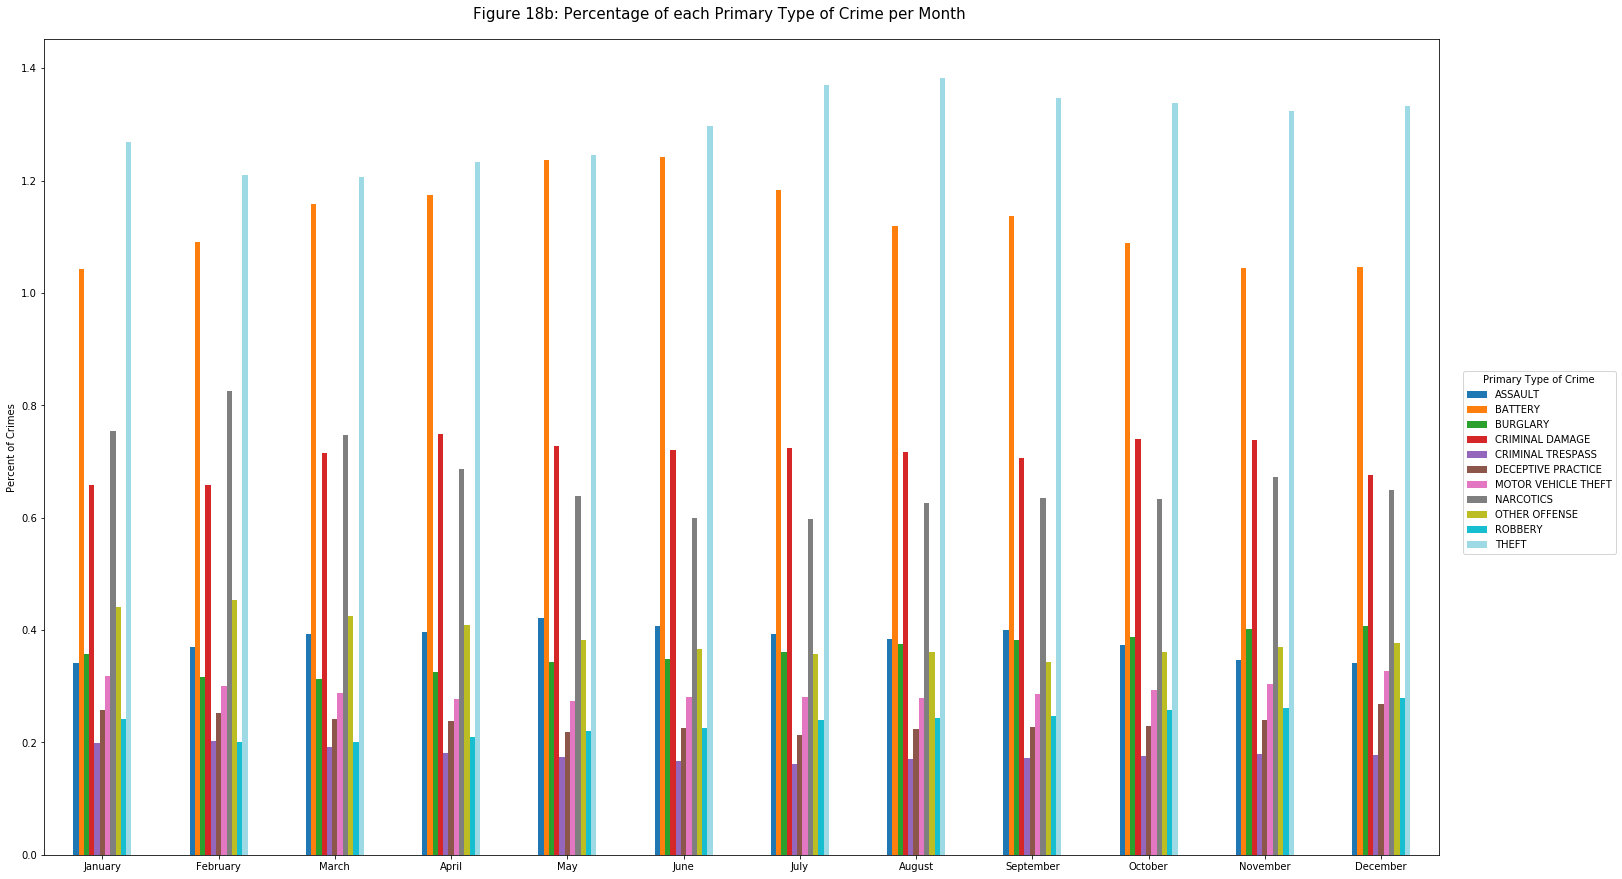

In [85]:
# Calculating the proportion of crimes within each month
crime_df_month['Totals'] = crime_df_month.sum(axis=1)
crime_df_month_prop = pd.DataFrame()
for m in crime_df_month.index: 
    for c in crime_df_month.columns:
        if c != 'Totals':
            crime_df_month_prop.loc[m, c] = crime_df_month.loc[m, c] * 100 / crime_df_month.loc[m, 'Totals']
            
# Making a bar plot of the percent of crimes per month
ax = crime_df_month_prop.plot.bar(figsize = (25, 15), subplots = False, legend = True, cmap = 'tab20', rot=0)
plt.suptitle('Figure 18b: Percentage of each Primary Type of Crime per Month', y = 0.91, size = 15)
plt.xticks(np.arange(0,12), ('January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'))
plt.ylabel('Percent of Crimes')
plt.legend(title='Primary Type of Crime', bbox_to_anchor=(1.13, 0.6))

## Type of Day

Figure 19 shows that there tends to be a higher proportion of crimes involving battery and a slightly lower proportion of crimes involving burglary and deceptive practice on the weekend.  

Text(0.5,0.98,'Figure 19: Proportion of Crimes by Type of Day')

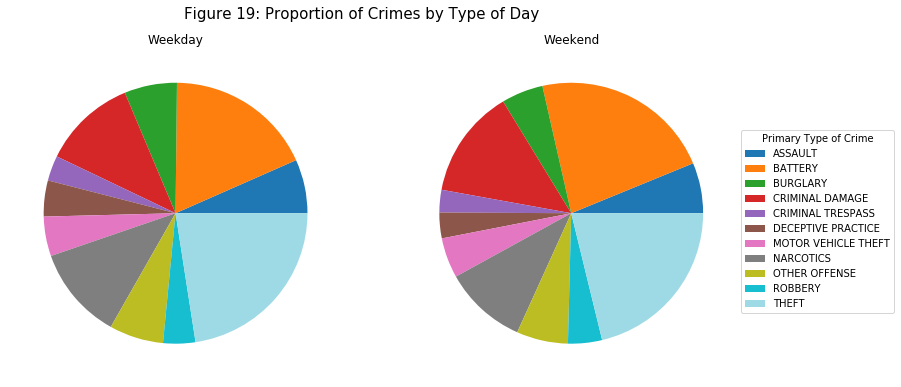

In [59]:
# Getting number of crimes per type of day and converting to a dataframe. 
crime_df_dt = crime_df.pivot_table(index = 'Day Type', columns = 'Primary Type', values = 'Date', aggfunc = len)

# Making pie charts
cmap = plt.cm.tab20
colors = cmap(np.linspace(0., 1., 11))
labels = crime_df_dt.columns

fig, axes = plt.subplots(1, 2, figsize = (13,6))

axes[0].pie(crime_df_dt.iloc[0,:], colors = colors)
axes[0].set_title('Weekday')

axes[1].pie(crime_df_dt.iloc[1,:], colors = colors)
axes[1].set_title('Weekend')

plt.legend(labels = labels, bbox_to_anchor=(1, .77), ncol = 1, prop={'size': 10}, title = 'Primary Type of Crime')
plt.suptitle('Figure 19: Proportion of Crimes by Type of Day', y = 0.98, size = 15)

## Federal Holidays

Figure 20a shows that Christmas and Independence Day have the highest proportions of crimes involving battery while Martin Luther King Jr. Day and Veterens Day have the lowest proportions.  New Year's Day has the highest proportion of crimes involving theft while Christmas has the lowest proportion. Washington's Birthday has the highest proportion of crimes involving narcotics while New Year's Day and Thanksgiving have the lowest proportions.  There seems to be some relationship between the type of holiday and the type of crime so this variable would be useful. 

Figure 20b shows that in general holidays have a slightly higher proportion of crimes involving battery.  

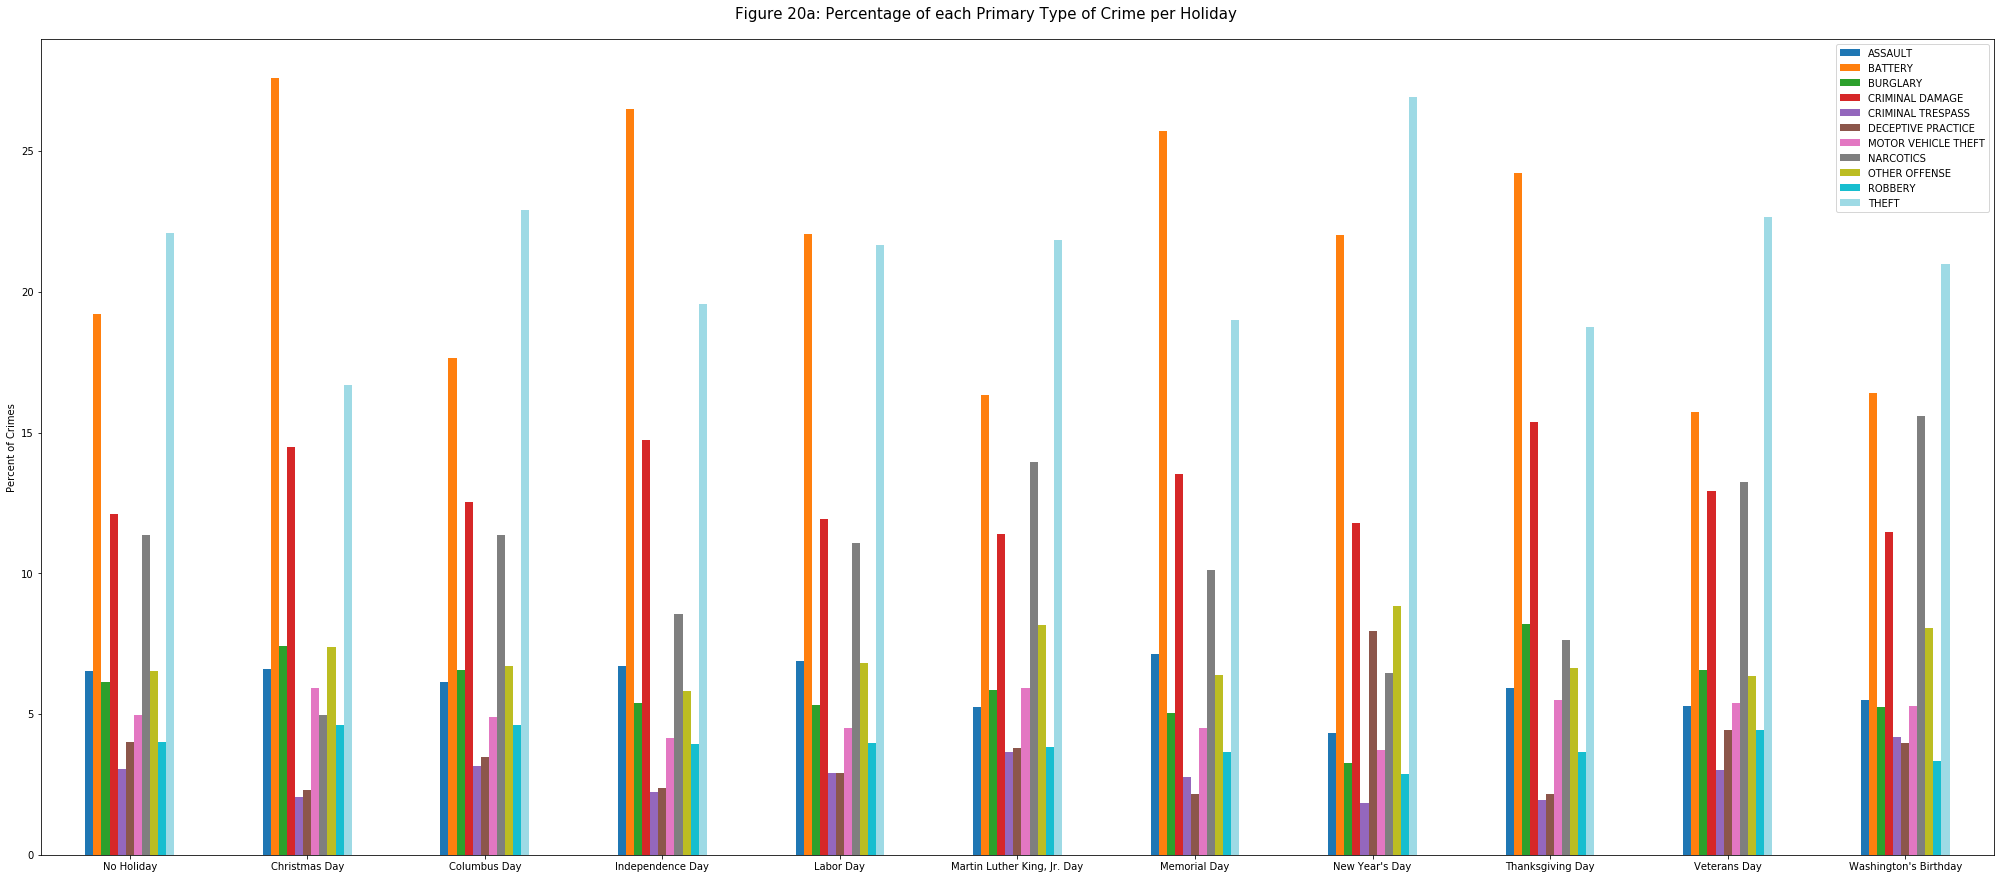

In [87]:
# Getting number of crimes per holiday and converting to a dataframe. Leaving out year 2018 as it is partial.  
crime_df_holiday = crime_df[crime_df['Year'] != 2018].pivot_table(index = 'Holiday', columns = 'Primary Type', values = 'Date', aggfunc = len)
crime_df_holiday = crime_df_holiday.reindex(['No Holiday', 'Christmas Day', 'Columbus Day', 'Independence Day', 'Labor Day',
       'Martin Luther King, Jr. Day', 'Memorial Day', 'New Year\'s Day', 'Thanksgiving Day', 'Veterans Day',
       'Washington\'s Birthday'])

# Calculating the proportion of crimes for each holiday
crime_df_holiday['Totals'] = crime_df_holiday.sum(axis=1)
crime_df_holiday_prop = pd.DataFrame()
for r in crime_df_holiday.index: 
    for c in crime_df_holiday.columns:
        if c != 'Totals':
            crime_df_holiday_prop.loc[r, c] = crime_df_holiday.loc[r, c] * 100 / crime_df_holiday.loc[r, 'Totals']

# Making a bar plot of the proportion of crimes per holiday
ax1 = crime_df_holiday_prop.plot.bar(figsize = (35,15), subplots = False, legend = True, colormap = 'tab20', stacked=False, rot=0)
_ = plt.suptitle('Figure 20a: Percentage of each Primary Type of Crime per Holiday', y = 0.91, size = 15)
_ = plt.ylabel('Percent of Crimes')

Text(0.5,0.98,'Figure 20b: Proportion of Crimes by Type of Day')

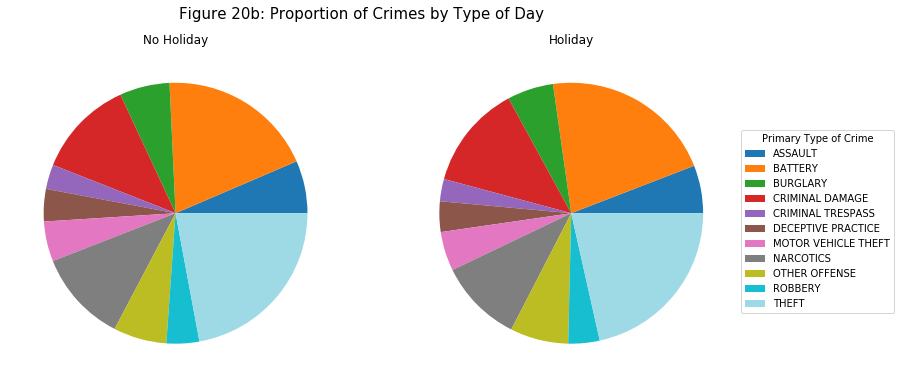

In [65]:
# Adding column to crime_df that says if the day is a federal holiday or not. 
crime_df['Is Holiday'] = list(map(lambda day: day != 'No Holiday', crime_df['Holiday']))

# Getting number of crimes per holiday/non holiday and converting to a dataframe. Leaving out year 2018 as it is partial.  
crime_df_isholiday = crime_df[crime_df['Year'] != 2018].pivot_table(index = 'Is Holiday', columns = 'Primary Type', values = 'Date', aggfunc = len)

# Making pie charts
cmap = plt.cm.tab20
colors = cmap(np.linspace(0., 1., 11))
labels = crime_df_isholiday.columns

fig, axes = plt.subplots(1, 2, figsize = (13,6))

axes[0].pie(crime_df_isholiday.iloc[0,:], colors = colors)
axes[0].set_title('No Holiday')

axes[1].pie(crime_df_isholiday.iloc[1,:], colors = colors)
axes[1].set_title('Holiday')

plt.legend(labels = labels, bbox_to_anchor=(1, .77), ncol = 1, prop={'size': 10}, title = 'Primary Type of Crime')
plt.suptitle('Figure 20b: Proportion of Crimes by Type of Day', y = 0.98, size = 15)

## Day of the Week

Figure 21a shows that the number of crimes involving battery is steady from Monday through Thursday and then increases through Sunday.  The number of crimes involving theft reach a maximum on Friday and then decrease through Sunday before increasing Monday. There is a gradual increase in the number of crimes involving criminal damage Friday and Saturday while the number of crimes involving narcotics decreases from Friday through Sunday. 

Looking at the proportions of crime for each day in Figure 21b, Saturday and Sunday have the highest proportions of crimes involving battery and criminal damage. Sunday has the lowest proportion of crimes involving theft and narcotics.  

It appears that the day of the week has some relationship with the type of crime, so this variable would be useful. 

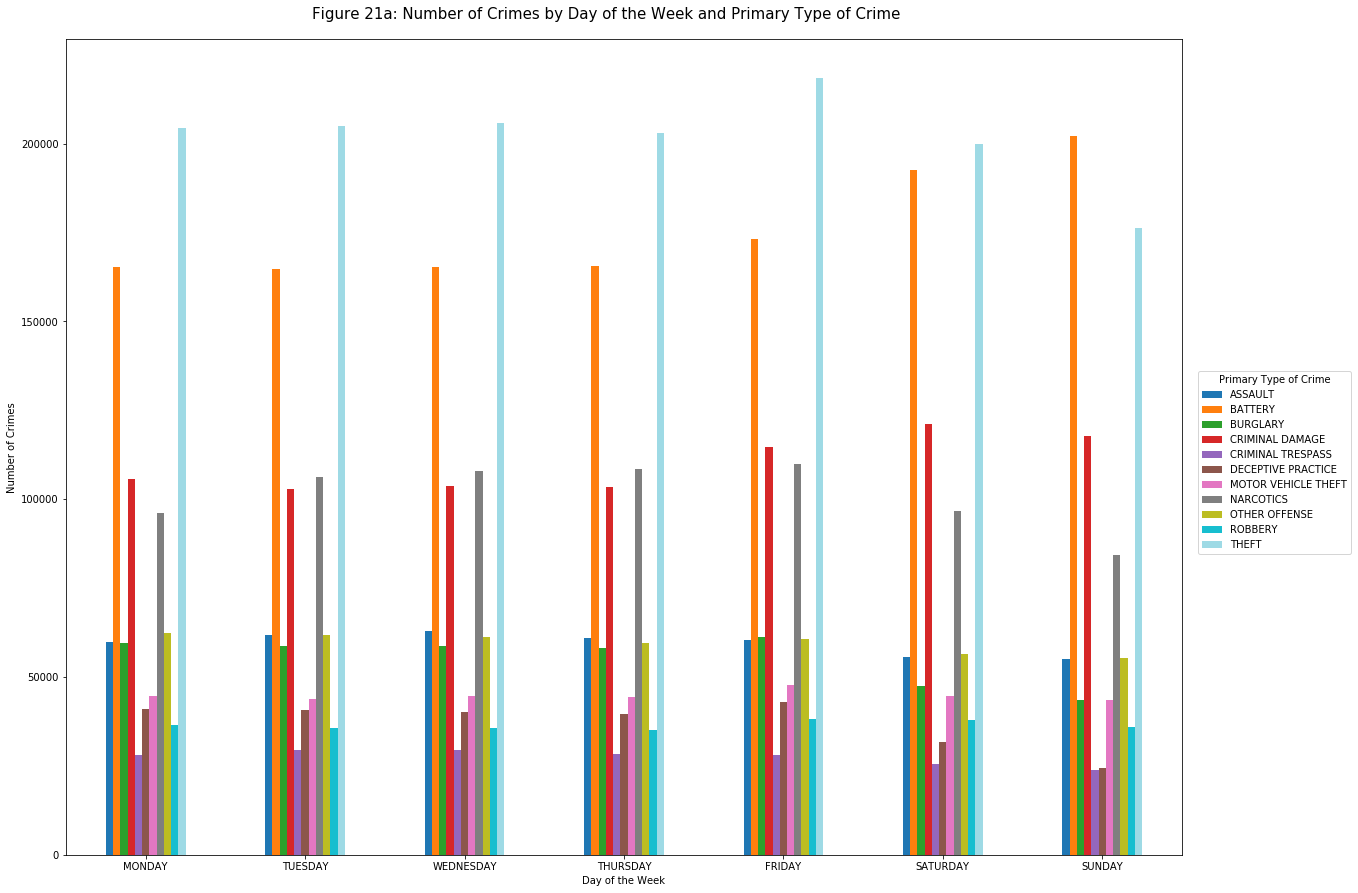

In [66]:
# Getting number of crimes per day of the week and converting to a dataframe. 
crime_df_dow = crime_df.pivot_table(index = 'Day of the Week', columns = 'Primary Type', values = 'Date', aggfunc = len)
crime_df_dow = crime_df_dow.reindex(['MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY', 'FRIDAY', 'SATURDAY', 'SUNDAY'])

# Making a bar plot of the number of crimes per each day of the week
ax = crime_df_dow.plot.bar(figsize = (20, 15), subplots = False, legend = True, cmap = 'tab20', rot=0)
plt.suptitle('Figure 21a: Number of Crimes by Day of the Week and Primary Type of Crime', y = 0.91, size = 15)
plt.ylabel('Number of Crimes')
plt.legend(title='Primary Type of Crime', bbox_to_anchor=(1.01, 0.6))

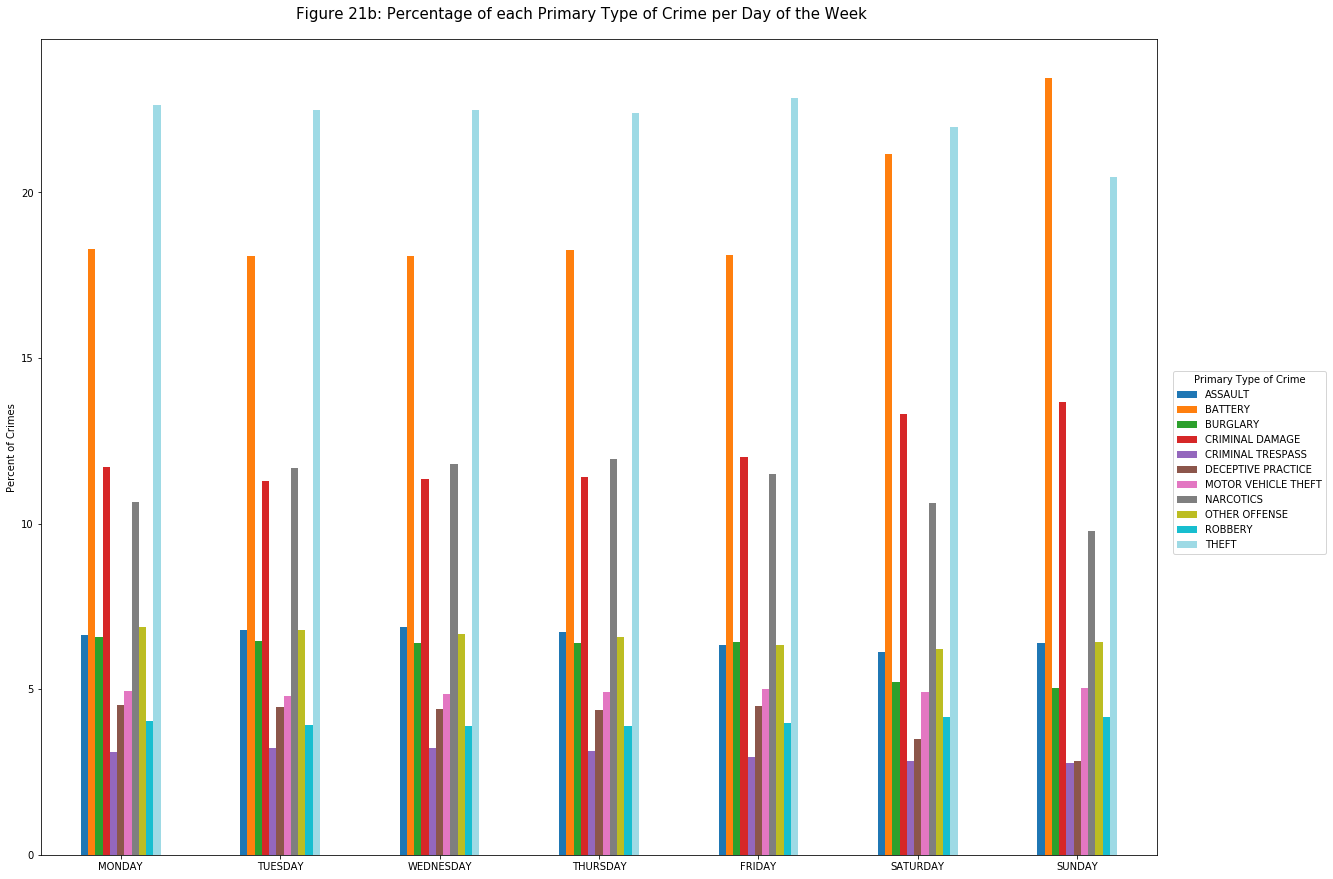

In [67]:
# Calculating the proportion of crimes for each day
crime_df_dow['Totals'] = crime_df_dow.sum(axis=1)
crime_df_dow_prop = pd.DataFrame()
for r in crime_df_dow.index: 
    for c in crime_df_dow.columns:
        if c != 'Totals':
            crime_df_dow_prop.loc[r, c] = crime_df_dow.loc[r, c] * 100 / crime_df_dow.loc[r, 'Totals']
            
# Making a bar plot of the proportion of crimes per each day of the week
ax = crime_df_dow_prop.plot.bar(figsize = (20, 15), subplots = False, legend = True, cmap = 'tab20', rot=0)
plt.suptitle('Figure 21b: Percentage of each Primary Type of Crime per Day of the Week', y = 0.91, size = 15)
plt.ylabel('Percent of Crimes')
plt.legend(title='Primary Type of Crime', bbox_to_anchor=(1.01, 0.6))

## Time of Day

Figure 22a shows that crimes involving theft occur most during the afternoon while the least occur overnight.  Crimes involving battery, narcotics, criminal damage, and motor vehicle theft occur most during the evening.  

Figure 22b shows the highest proportions of crimes involving theft occur during the morning and afternoon hours.  The highest proportion of crimes involving narcotics occurs during the evening hours.   And the highest proportion of crimes involving battery and criminal damage occur during the overnight hours.

Figure 22c shows that the number of crimes involving theft reaches a maximum at 12pm and a minimum at 4/5am.  The number of crimes involving battery are generally at a maximum at 9/10pm.  And the number of crimes involving narcotics are at a maximum at 7-9pm.  

Figure 22d shows that the highest proportion of crimes involving battery occur at 2-3am.  The proportion of crimes involving theft are somewhat steady from 7am-6pm and then drop off, reaching a minimum at 2-5am.  The proportion of crimes involving narcotics are the highest at 7-9pm

It appears that the time of day/hour may help in the prediction of the type of crime. 

Text(0.05,0.94,'Morning: 6am-11am\nAfternoon: 12pm-5pm\nEvening: 6pm-11pm\nOvernight: 12am-5am')

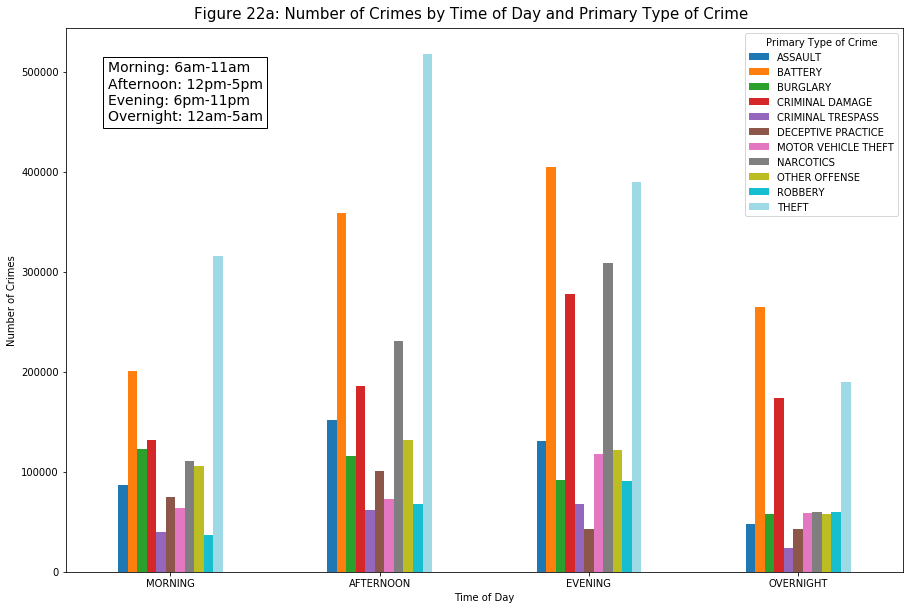

In [79]:
# Getting number of crimes per time of day and converting to a dataframe. 
crime_df_tod = crime_df.pivot_table(index = 'Part of Day', columns = 'Primary Type', values = 'Date', aggfunc = len)
crime_df_tod = crime_df_tod.reindex(['MORNING', 'AFTERNOON', 'EVENING', 'OVERNIGHT'])

# Making a bar plot of the number of crimes per part of the day
ax = crime_df_tod.plot.bar(figsize = (15, 10), subplots = False, legend = True, cmap = 'tab20', rot=0)
_ = plt.suptitle('Figure 22a: Number of Crimes by Time of Day and Primary Type of Crime', y = 0.91, size = 15)
_ = plt.legend(title='Primary Type of Crime')
_ = plt.xlabel('Time of Day')
_ = plt.ylabel('Number of Crimes')

# Text Box
text = 'Morning: 6am-11am\nAfternoon: 12pm-5pm\nEvening: 6pm-11pm\nOvernight: 12am-5am'
props = dict(boxstyle='square', facecolor='white')
ax.text(0.05, 0.94, text, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

Text(0.5,0.92,'Figure 22b: Proportion of Crimes by Time of day')

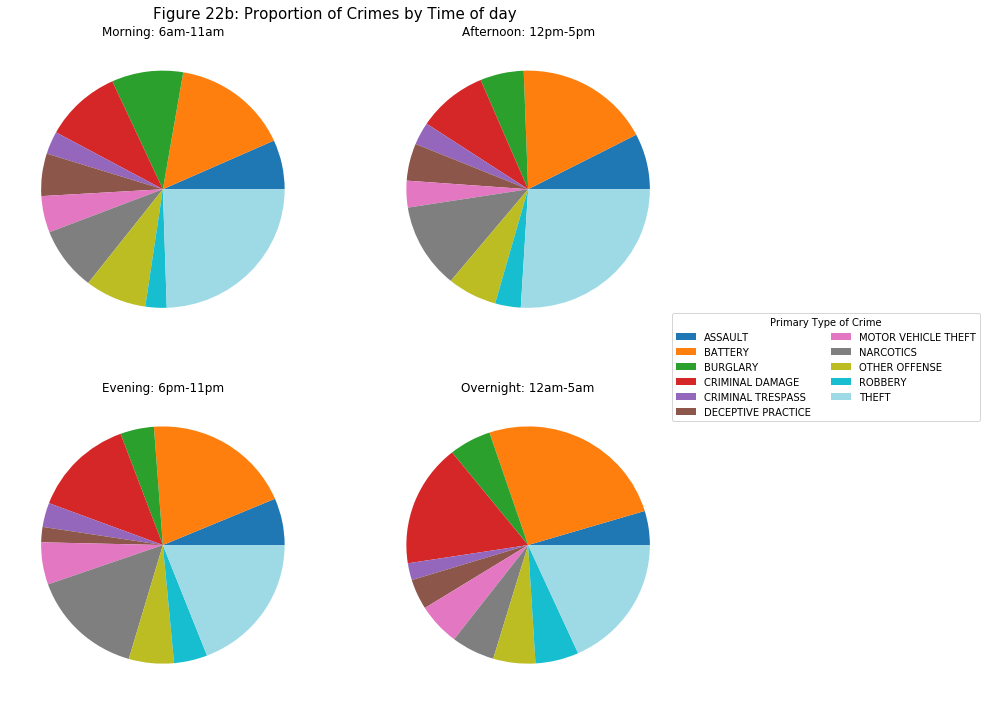

In [82]:
# Making pie charts
cmap = plt.cm.tab20
colors = cmap(np.linspace(0., 1., 11))
labels = crime_df_tod.columns

fig, axes = plt.subplots(2, 2, figsize = (12,12))

axes[0,0].pie(crime_df_tod.iloc[0,:], colors = colors)
axes[0,0].set_title('Morning: 6am-11am')

axes[0,1].pie(crime_df_tod.iloc[1,:], colors = colors)
axes[0,1].set_title('Afternoon: 12pm-5pm')
    
axes[1,0].pie(crime_df_tod.iloc[2,:], colors = colors)
axes[1,0].set_title('Evening: 6pm-11pm')

axes[1,1].pie(crime_df_tod.iloc[3,:], colors = colors)
axes[1,1].set_title('Overnight: 12am-5am')

plt.legend(labels = labels, bbox_to_anchor=(2, 1.3), ncol = 2, prop={'size': 10}, title = 'Primary Type of Crime')
plt.suptitle('Figure 22b: Proportion of Crimes by Time of day', y = 0.92, size = 15)

In [68]:
# Creating a new column with the hour of the crime
crime_df['Hour'] = list(map(lambda i: i.hour, crime_df['Date']))

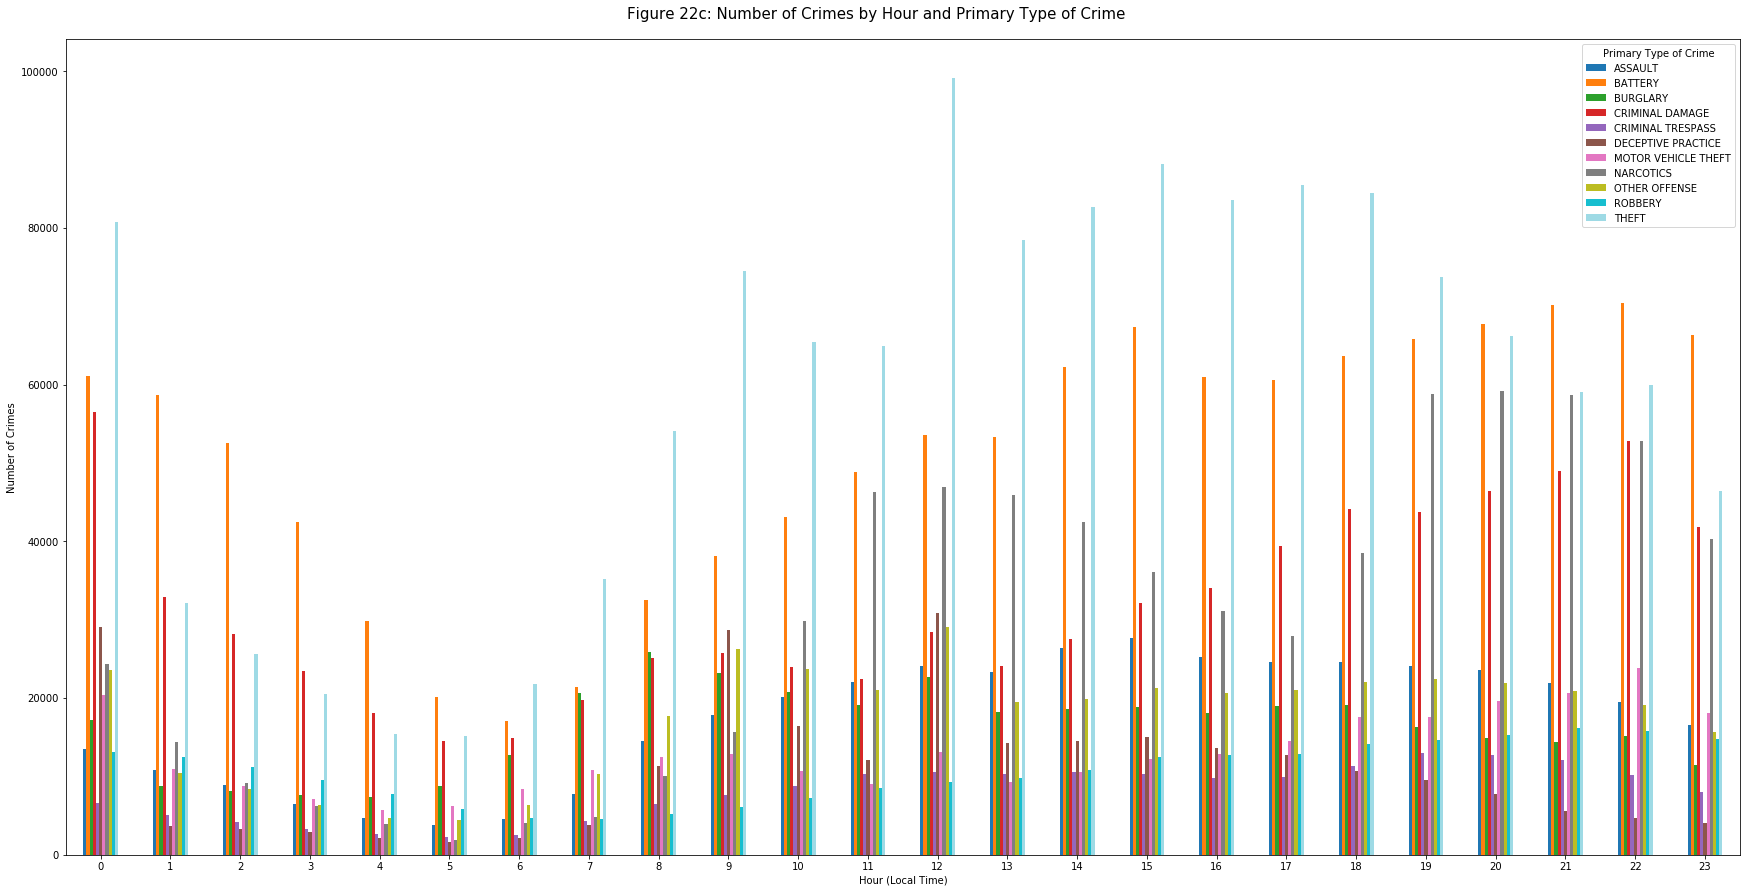

In [69]:
# Getting number of crimes per hour of day and converting to a dataframe. 
crime_df_hour = crime_df.pivot_table(index = 'Hour', columns = 'Primary Type', values = 'Date', aggfunc = len)

# Making a bar plot of the number of crimes per hour
ax = crime_df_hour.plot.bar(figsize = (30, 15), subplots = False, legend = True, cmap = 'tab20', rot=0)
_ = plt.suptitle('Figure 22c: Number of Crimes by Hour and Primary Type of Crime', y = 0.91, size = 15)
_ = plt.legend(title='Primary Type of Crime')
_ = plt.xlabel('Hour (Local Time)')
_ = plt.ylabel('Number of Crimes')

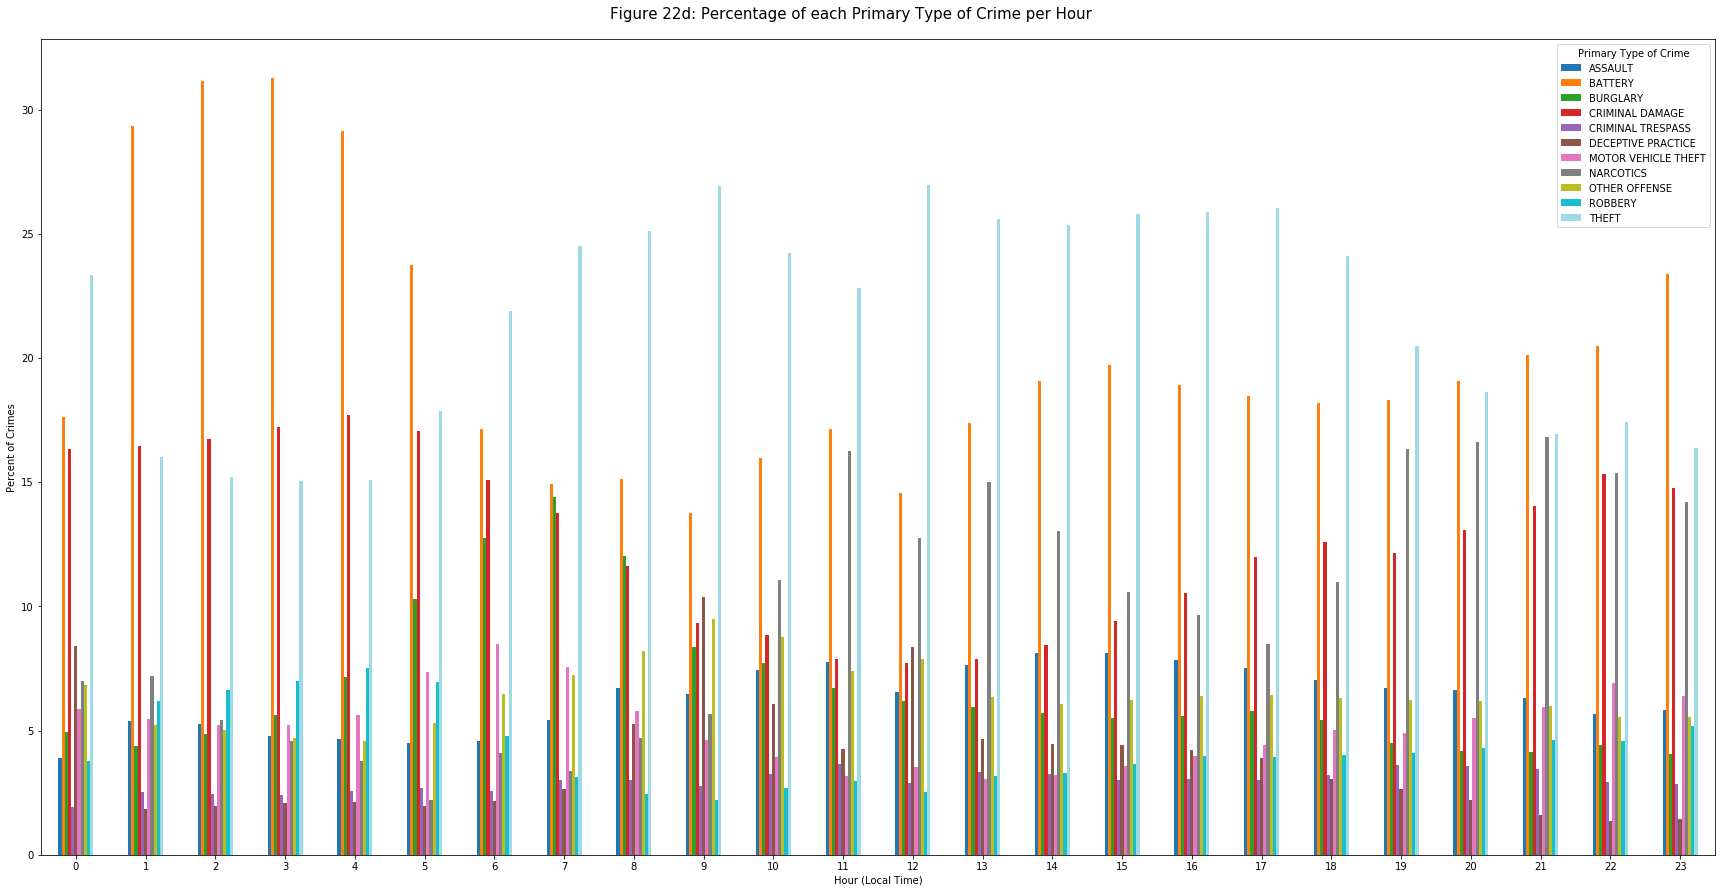

In [70]:
# Calculating the proportion of crimes per hour
crime_df_hour['Totals'] = crime_df_hour.sum(axis=1)
crime_df_hour_prop = pd.DataFrame()
for r in crime_df_hour.index: 
    for c in crime_df_hour.columns:
        if c != 'Totals':
            crime_df_hour_prop.loc[r, c] = crime_df_hour.loc[r, c] * 100 / crime_df_hour.loc[r, 'Totals']
            
# Making a bar plot of the proportion of crimes per hour
ax = crime_df_hour_prop.plot.bar(figsize = (30, 15), subplots = False, legend = True, cmap = 'tab20', rot=0)
_ = plt.suptitle('Figure 22d: Percentage of each Primary Type of Crime per Hour', y = 0.91, size = 15)
_ = plt.legend(title='Primary Type of Crime')
_ = plt.xlabel('Hour (Local Time)')
_ = plt.ylabel('Percent of Crimes')